In [1]:
import pandas as pd
from fastparquet import ParquetFile
import duckdb
from bs4 import BeautifulSoup
import requests
import re

In [119]:
p1 = ParquetFile("first_half.parquet").to_pandas()

In [2]:
p2 = ParquetFile("second_half.parquet").to_pandas()

<Axes: title={'center': '★ Falchion Knife over Time'}, xlabel='date'>

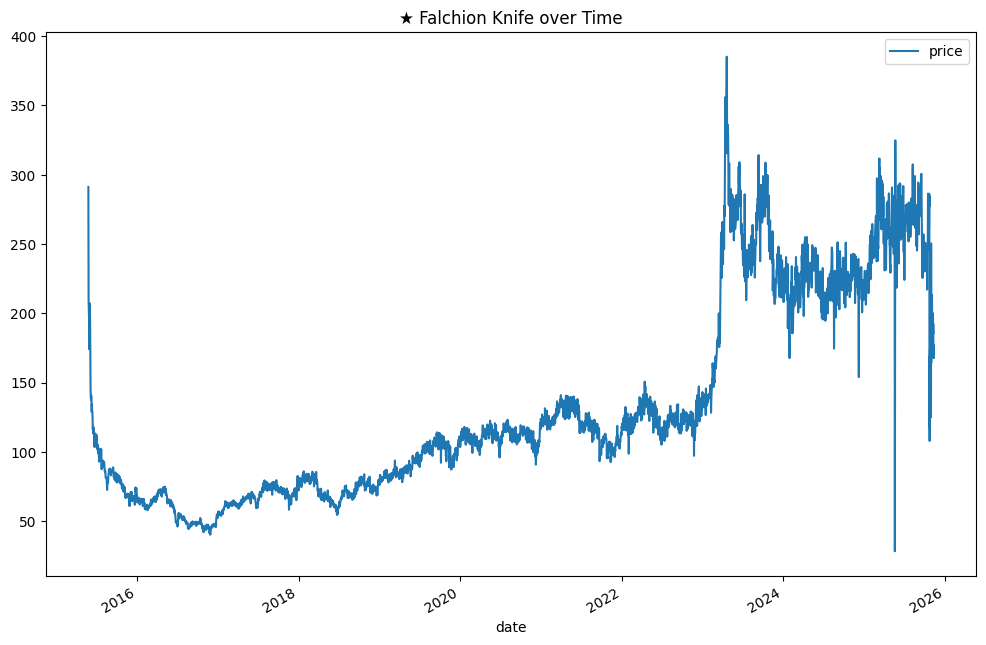

In [16]:
duckdb.query("select * from p2 where id = '★ Falchion Knife'").df().plot.line(
    x="date",
    y="price",
    figsize=(12, 8),
    title= "★ Falchion Knife over Time"
)

In [65]:
p1 = p1.dropna(subset="item").drop(columns=["id"])
p2 = p2.rename(columns={"id" : "item"})
pd.concat([p1,p2]).drop_duplicates().to_parquet("../first_half.parquet")

In [12]:
item_df = pd.read_csv("./item_rarities.csv")

In [20]:
item_rarity_map = {
    "Covert": "red",
    "Classified" : "pink",
    "Restricted" : "purple",
    "Mil-spec" : "blue",
    "Industrial": "light-blue",
    "Consumer" : "gray"
}

item_df["Color Rarity"] = item_df["Rarity"].map(item_rarity_map)

In [67]:
graffiti_df = p1[p1["item"].str.contains("Graffiti", na=False)]
graffiti_df.to_parquet("graffiti.parquet")

In [19]:
sticker_df = p1[p1["item"].str.contains("Sticker", na=False)]

NameError: name 'p1' is not defined

In [3]:
url = "https://raw.githubusercontent.com/ByMykel/CSGO-API/main/public/api/en"


In [5]:
res = requests.get(url + "/stickers.json")
data = res.json()

sticker_data_df = pd.json_normalize(data, sep="_")

want = {
    "id": "id",
    "name": "name",
    "type": "type",
    "effect": "effect",
    "market_hash_name": "market_hash_name",
    "rarity_name": "rarity",
    "rarity_color": "rarity_color",
    "tournament_id": "tournament_id",
    "tournament_name": "tournament",
    "team_id": "team_id",
    "team_tag": "team_tag",
    "team_name": "team",
    "image": "image_url",
}

out = (sticker_data_df.rename(columns=want).reindex(columns=want.values(), fill_value=pd.NA))

out = out.drop(columns=["id"]).rename(columns={"name": "item"})
duckdb.query("SELECT DISTINCT rarity_color FROM out")

┌──────────────┐
│ rarity_color │
│   varchar    │
├──────────────┤
│ #8847ff      │
│ #ded6cc      │
│ #eb4b4b      │
│ #e4ae39      │
│ #d32ce6      │
│ #4b69ff      │
└──────────────┘

In [ ]:
sticker_color_map = {
    "#e4ae39": "gold",
    "#eb4b4b" : "red",
    "#8847ff" : "purple",
    "#d32ce6" : "pink",
    "#4b69ff" : "blue",
    "#ded6cc" : "gray"
}


out["color"] = out["rarity_color"].map(sticker_color_map)
out = out.drop(columns=["rarity_color"])
out = out.rename(columns={"color": "rarity_color"}).copy()

In [10]:
out.head()

item   type effect market_hash_name   rarity  \
0               Sticker | Shooter  Event  Other             None  Default   
1        Sticker | Shooter (Foil)  Event   Foil             None  Default   
2         Sticker | Shooter Close  Event  Other             None  Default   
3  Sticker | Shooter Close (Foil)  Event   Foil             None  Default   
4        Sticker | Blue Snowflake  Event  Other             None  Default   

  rarity_color  tournament_id             tournament  team_id team_tag team  \
0      #ded6cc            1.0  2013 DreamHack Winter      NaN      NaN  NaN   
1      #ded6cc            1.0  2013 DreamHack Winter      NaN      NaN  NaN   
2      #ded6cc            1.0  2013 DreamHack Winter      NaN      NaN  NaN   
3      #ded6cc            1.0  2013 DreamHack Winter      NaN      NaN  NaN   
4      #ded6cc            1.0  2013 DreamHack Winter      NaN      NaN  NaN   

                                           image_url color  
0  https://cdn.steamstatic.com/apps/730/icons/eco...  gray  
1  https://cdn.steamstatic.com/apps/730/icons/eco...  gray  
2  https://cdn.steamstatic.com/apps/730/icons/eco...  gray  
3  https://cdn.steamstatic.com/apps/730/icons/eco...  gray  
4  https://cdn.steamstatic.com/apps/730/icons/eco...  gray

In [2]:
stkr = ParquetFile("sticker.parquet").to_pandas()

In [5]:
stkr["tournament"].drop_duplicates()

0               2019 StarLadder Berlin
2227                 2019 IEM Katowice
3720                  2022 PGL Antwerp
5096               PGL Copenhagen 2024
5889               BLAST.tv Paris 2023
7034                      IEM Rio 2022
12168                             None
27844             2017 ELEAGUE Atlanta
28369              2018 ELEAGUE Boston
29684             2016 ESL One Cologne
30346                  2017 PGL Krakow
32090               2018 FACEIT London
33105                2016 MLG Columbus
73700       2015 DreamHack Cluj-Napoca
76050            2014 DreamHack Winter
124498              2021 PGL Stockholm
162896            2015 ESL One Cologne
171408           2015 ESL One Katowice
172991            2014 ESL One Cologne
182474           2014 EMS One Katowice
190605                        2020 RMR
8446083    Perfect World Shanghai 2024
Name: tournament, dtype: object

In [ ]:
names = stkr[stkr["type"] == 'Autograph']["item"].drop_duplicates()

In [ ]:
names

In [23]:
stkr["item"].drop_duplicates()

0                 Sticker | Aleksib (Foil) | Berlin 2019
2227            Sticker | Aleksib (Foil) | Katowice 2019
3720          Sticker | Aleksib (Glitter) | Antwerp 2022
5096       Sticker | Aleksib (Glitter) | Copenhagen 2024
5889            Sticker | Aleksib (Glitter) | Paris 2023
                               ...                      
8801923                  Sticker | bLitz | Shanghai 2024
8802424        Sticker | aliStair (Holo) | Shanghai 2024
8802755                              Sticker | Taste Bud
8803866      Sticker | electronic (Gold) | Shanghai 2024
8803982                             Sticker | Boom Blast
Name: item, Length: 6593, dtype: object

<Axes: xlabel='date'>

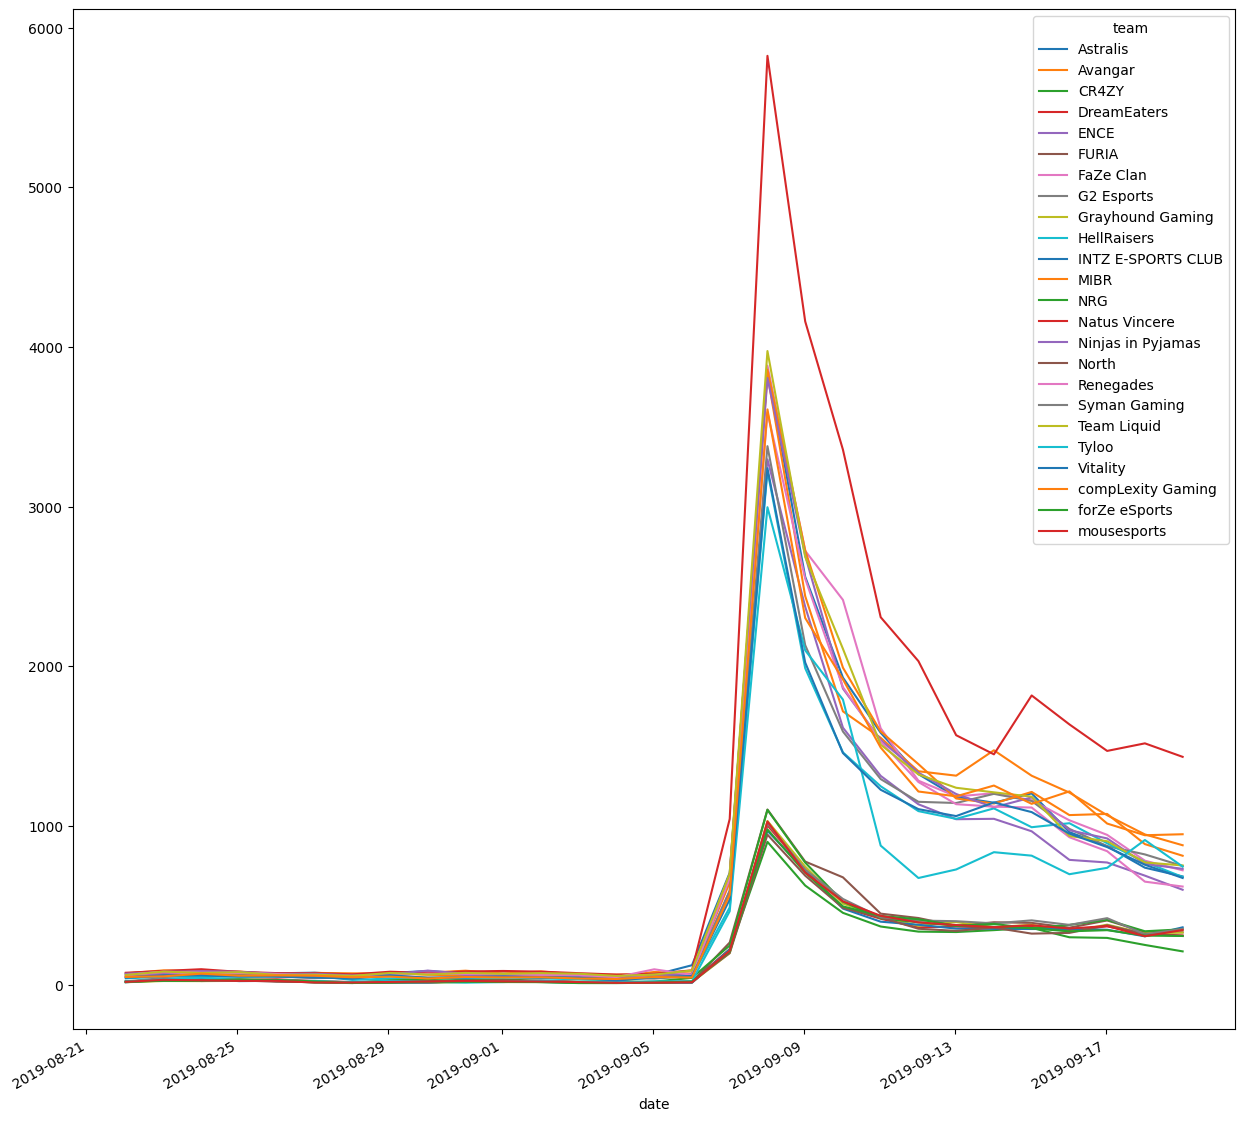

In [68]:
duckdb.query("select team, volume as money, date from stkr where tournament_id = 16 and ABS(DATEDIFF('day', '2019-09-05',date)) < 15").df().pivot_table(columns="team", values="money", index="date").dropna().reset_index().plot.line(
    x="date",
    figsize=(15,15)
)



C:\Users\curti\miniconda3\envs\MarketReview\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


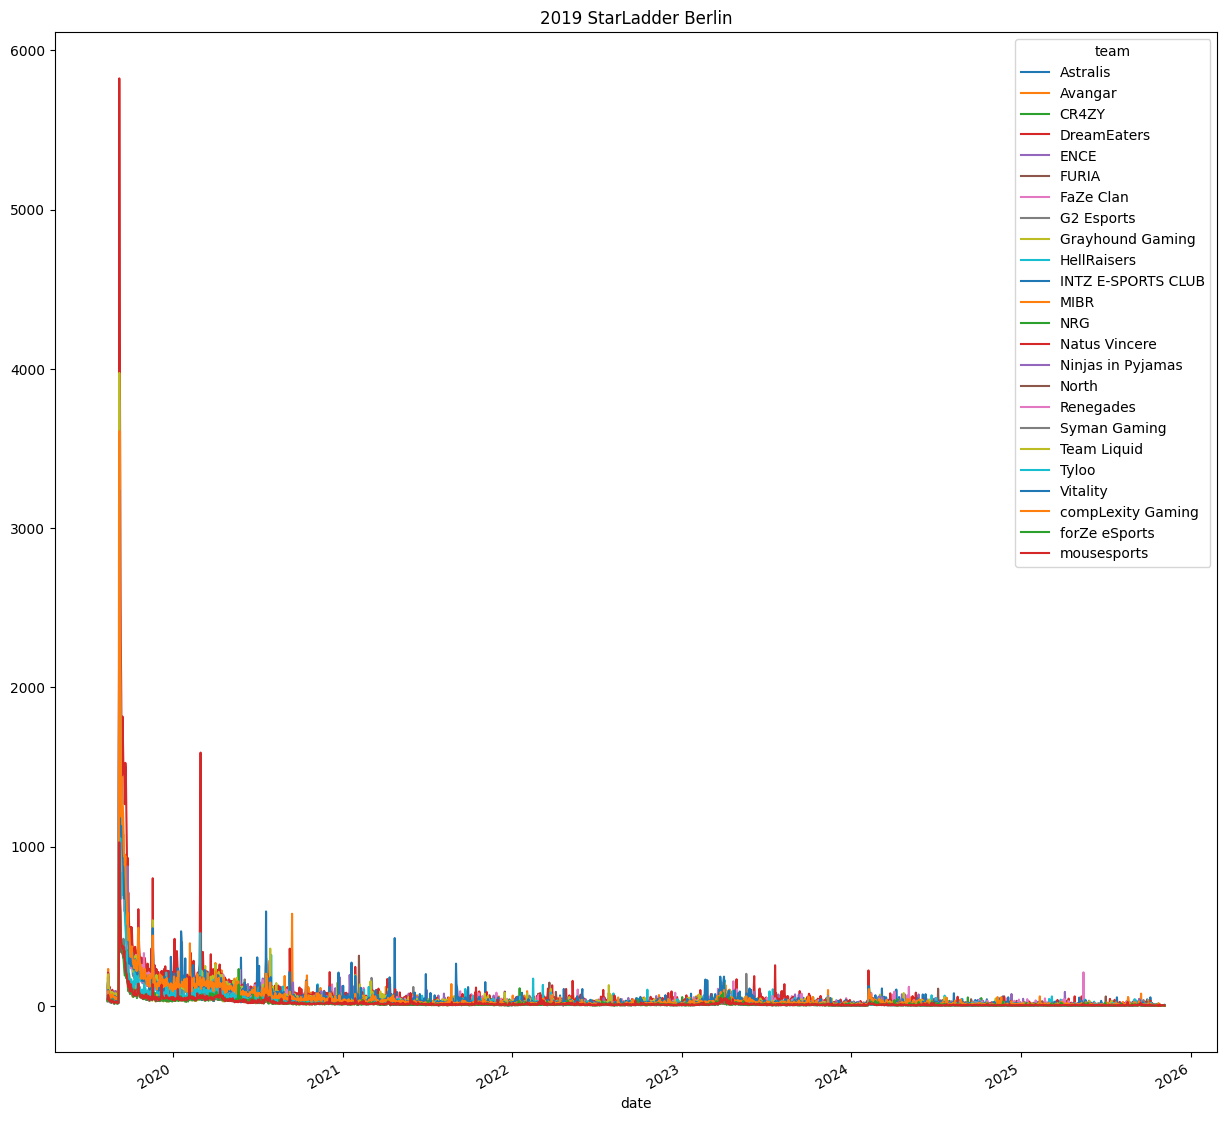

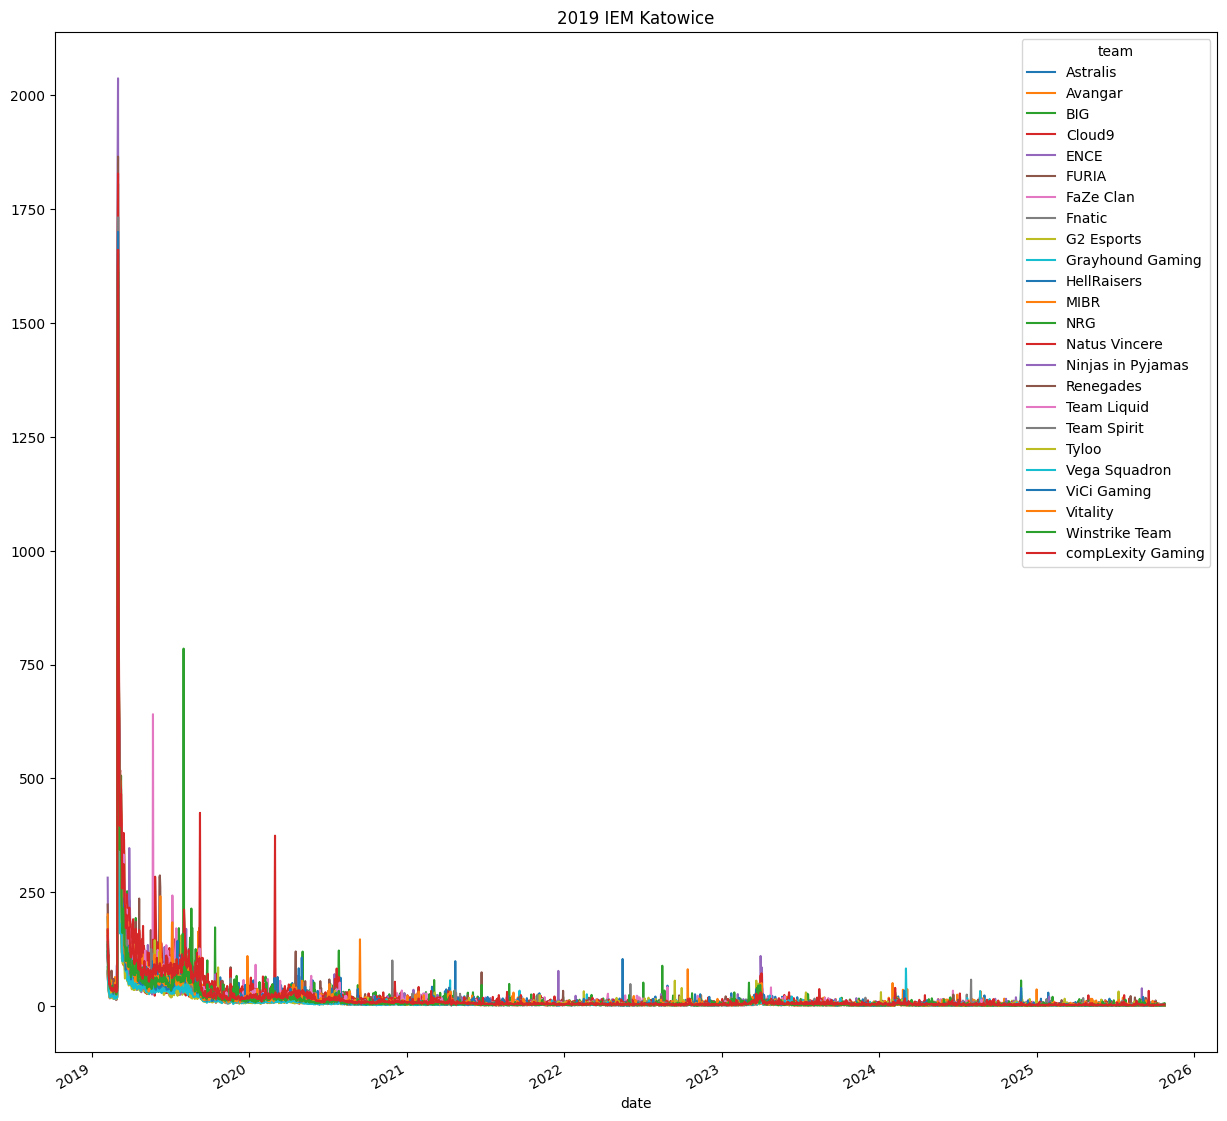

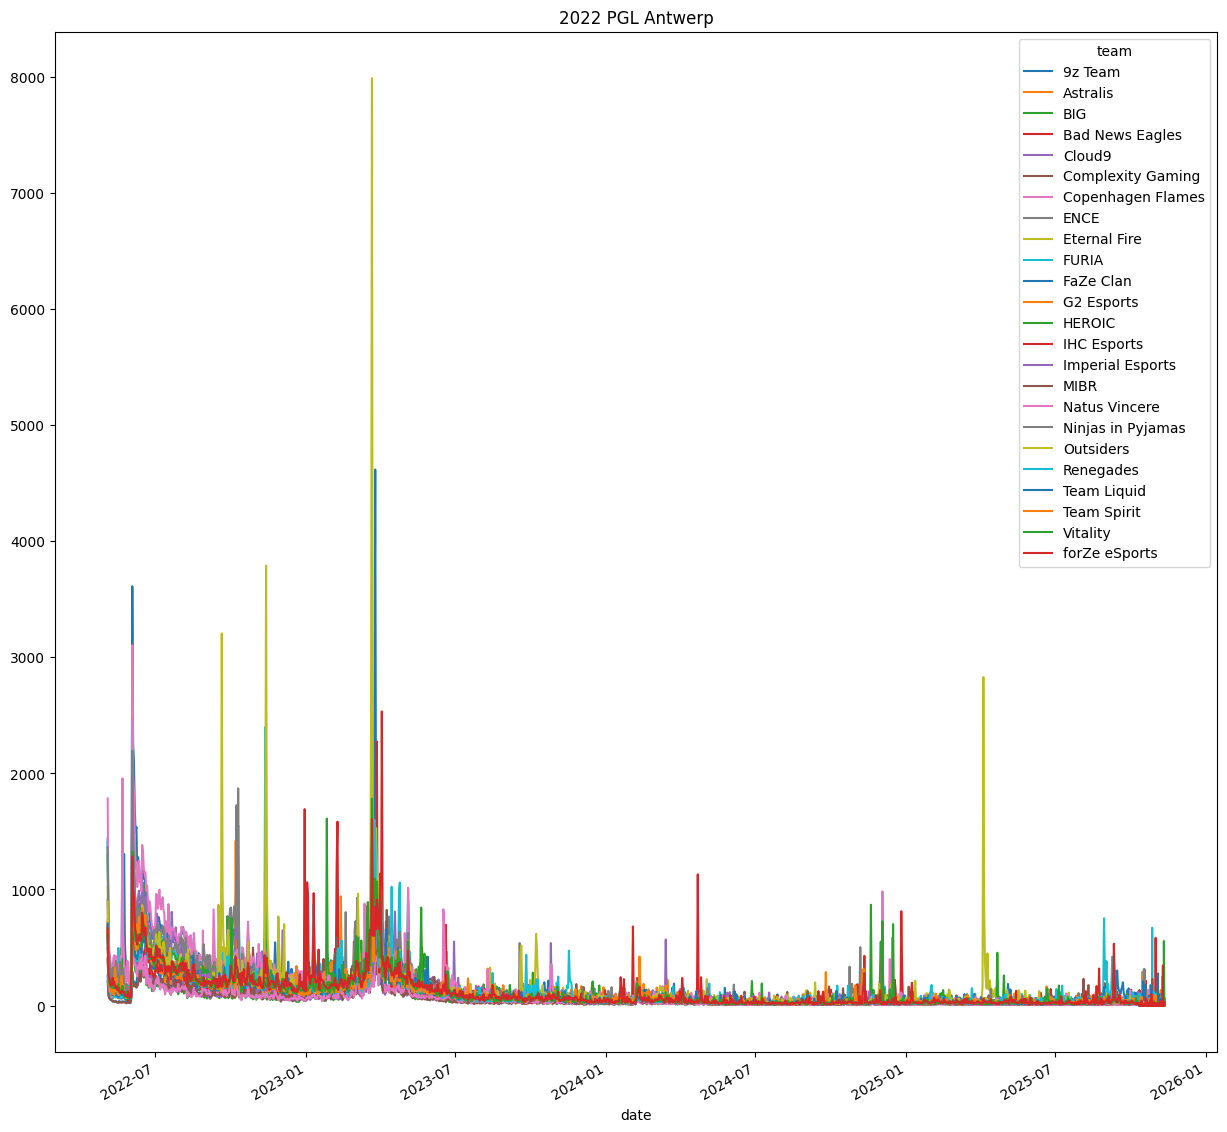

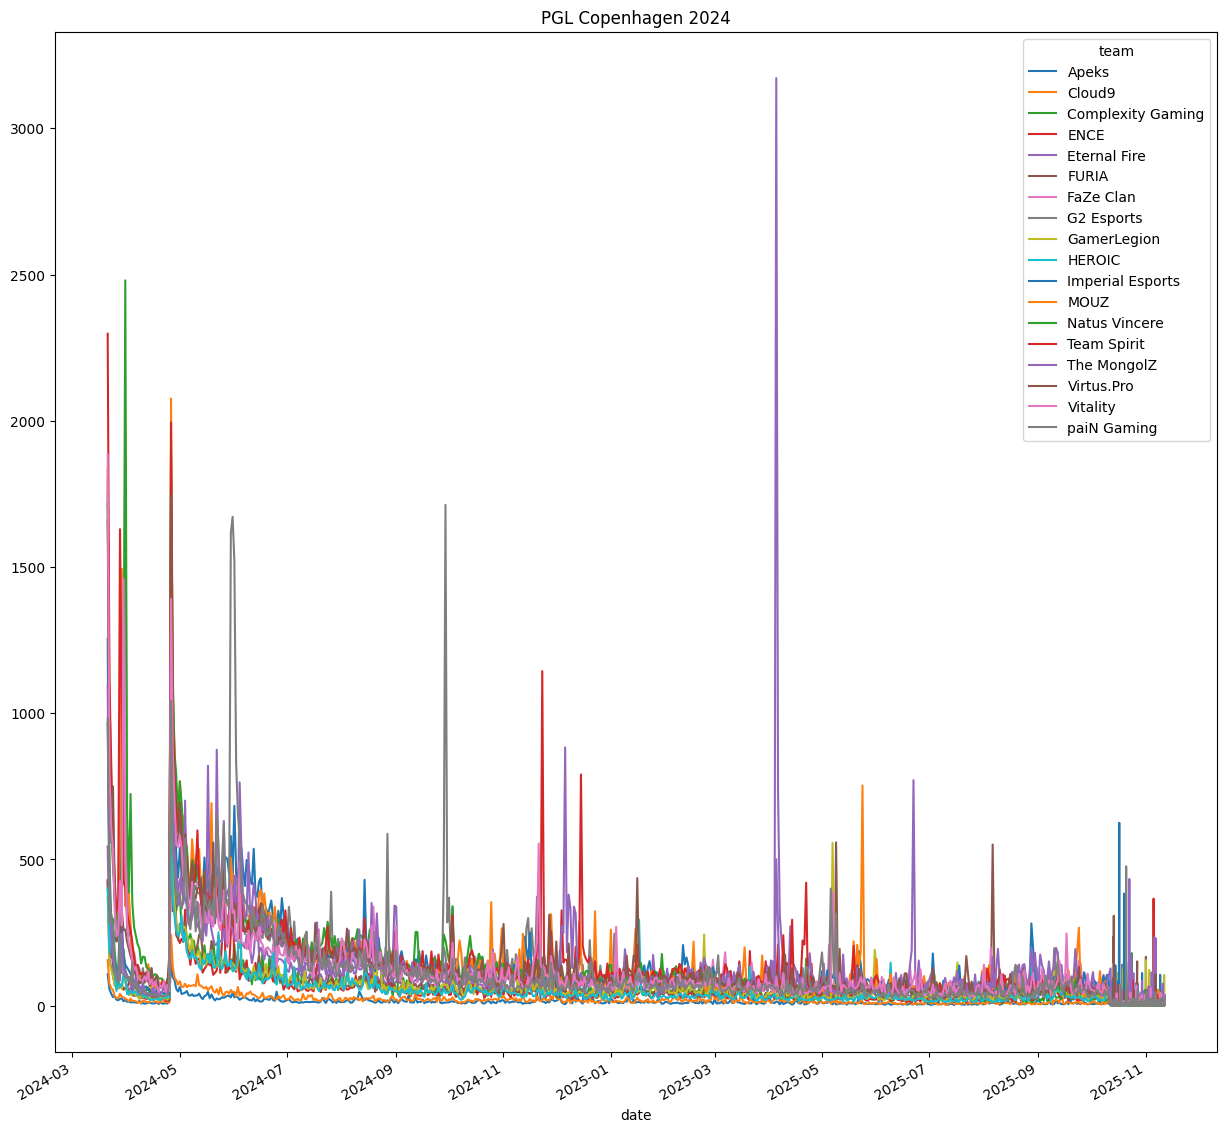

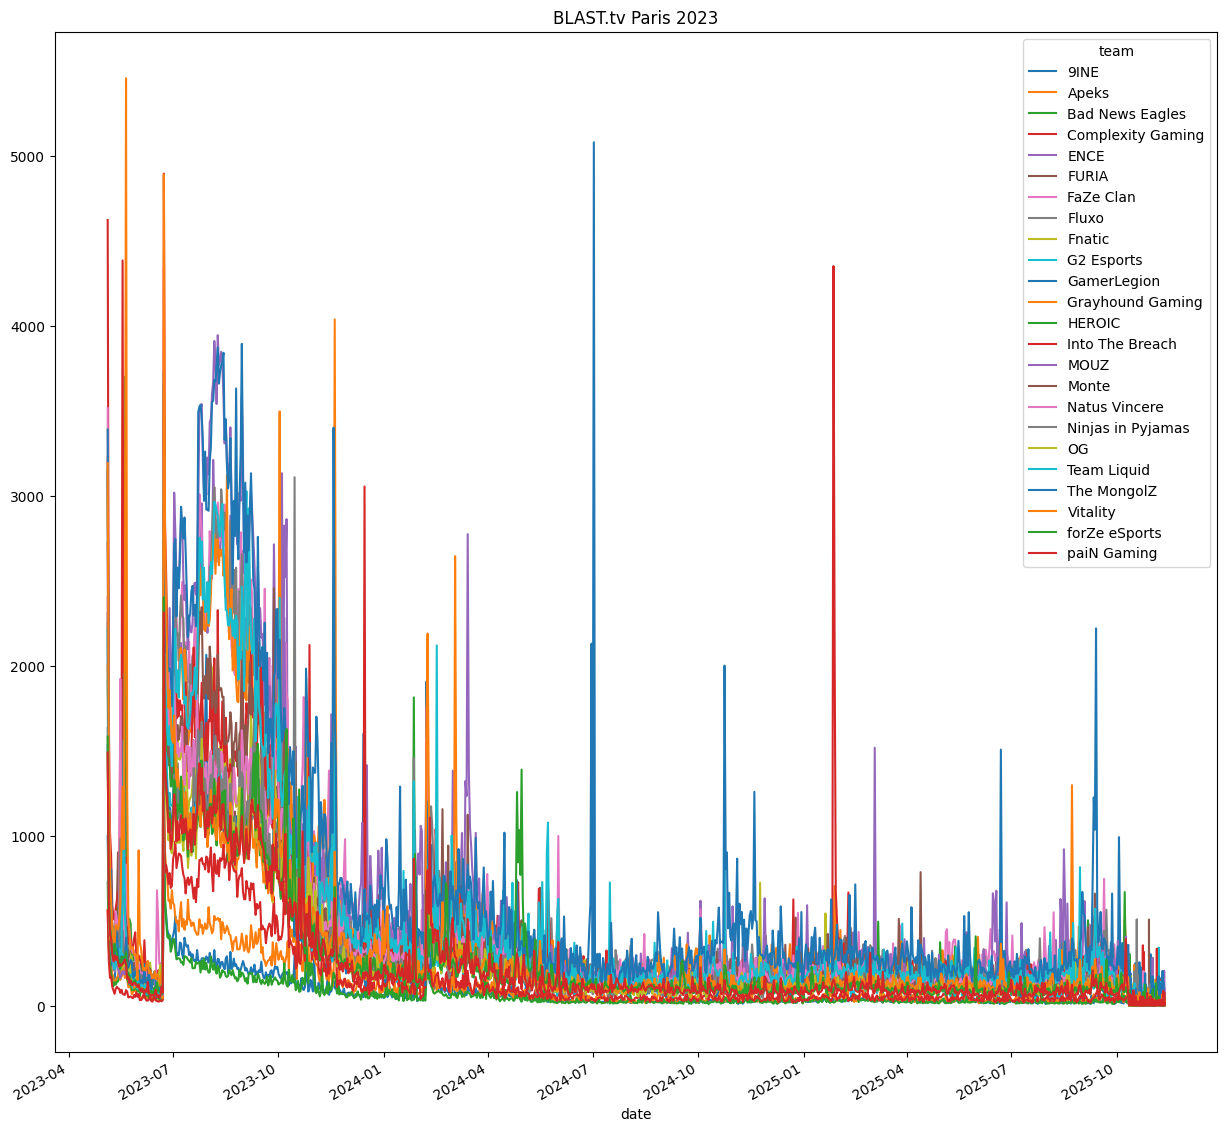

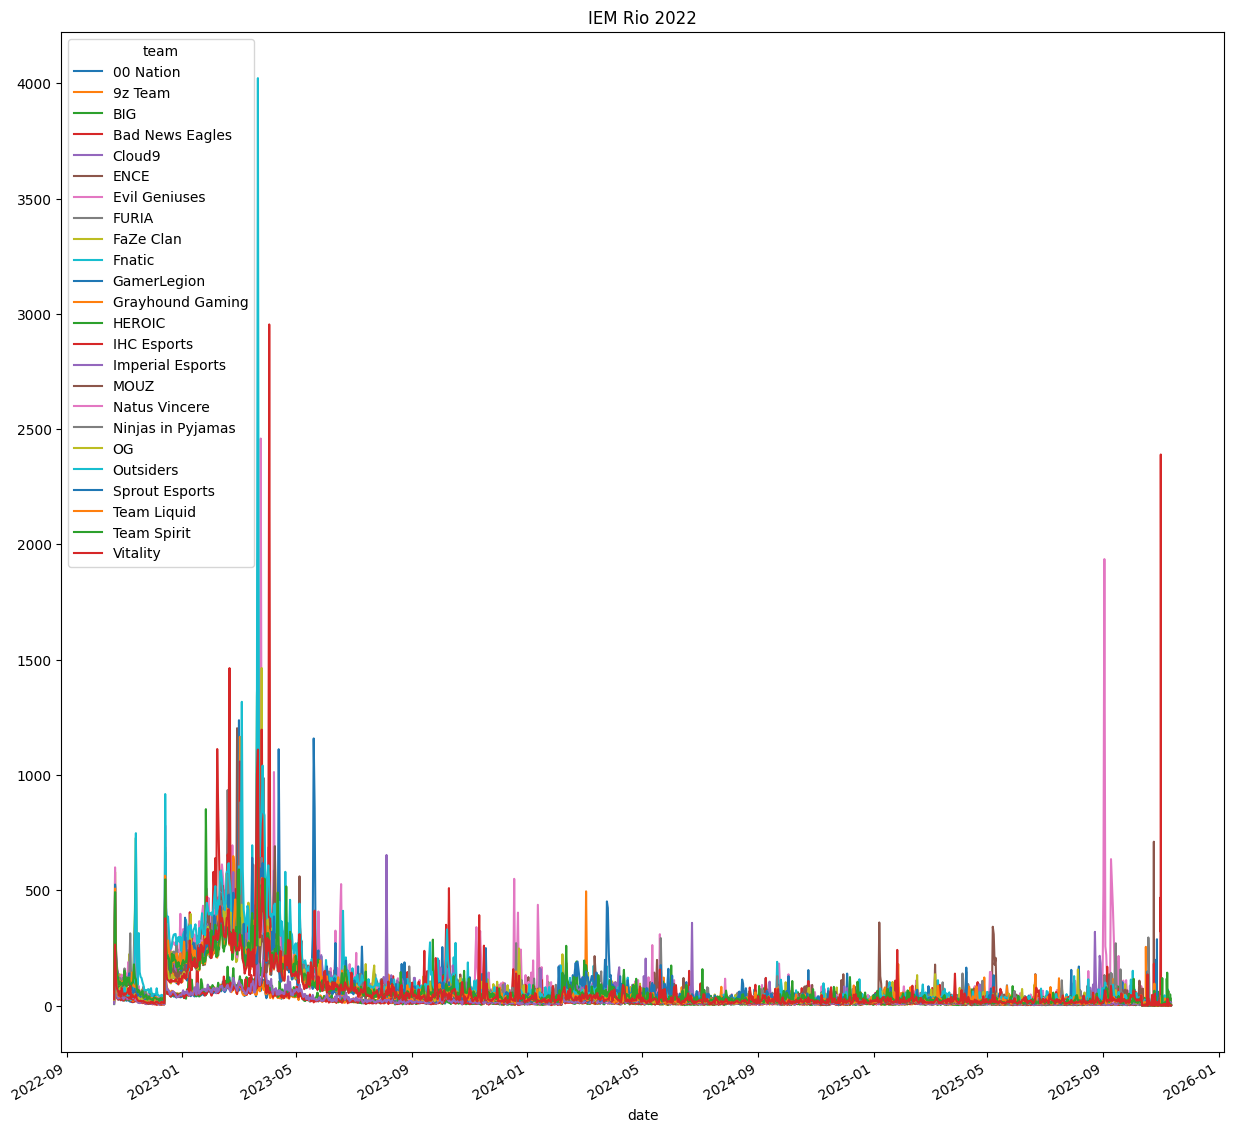

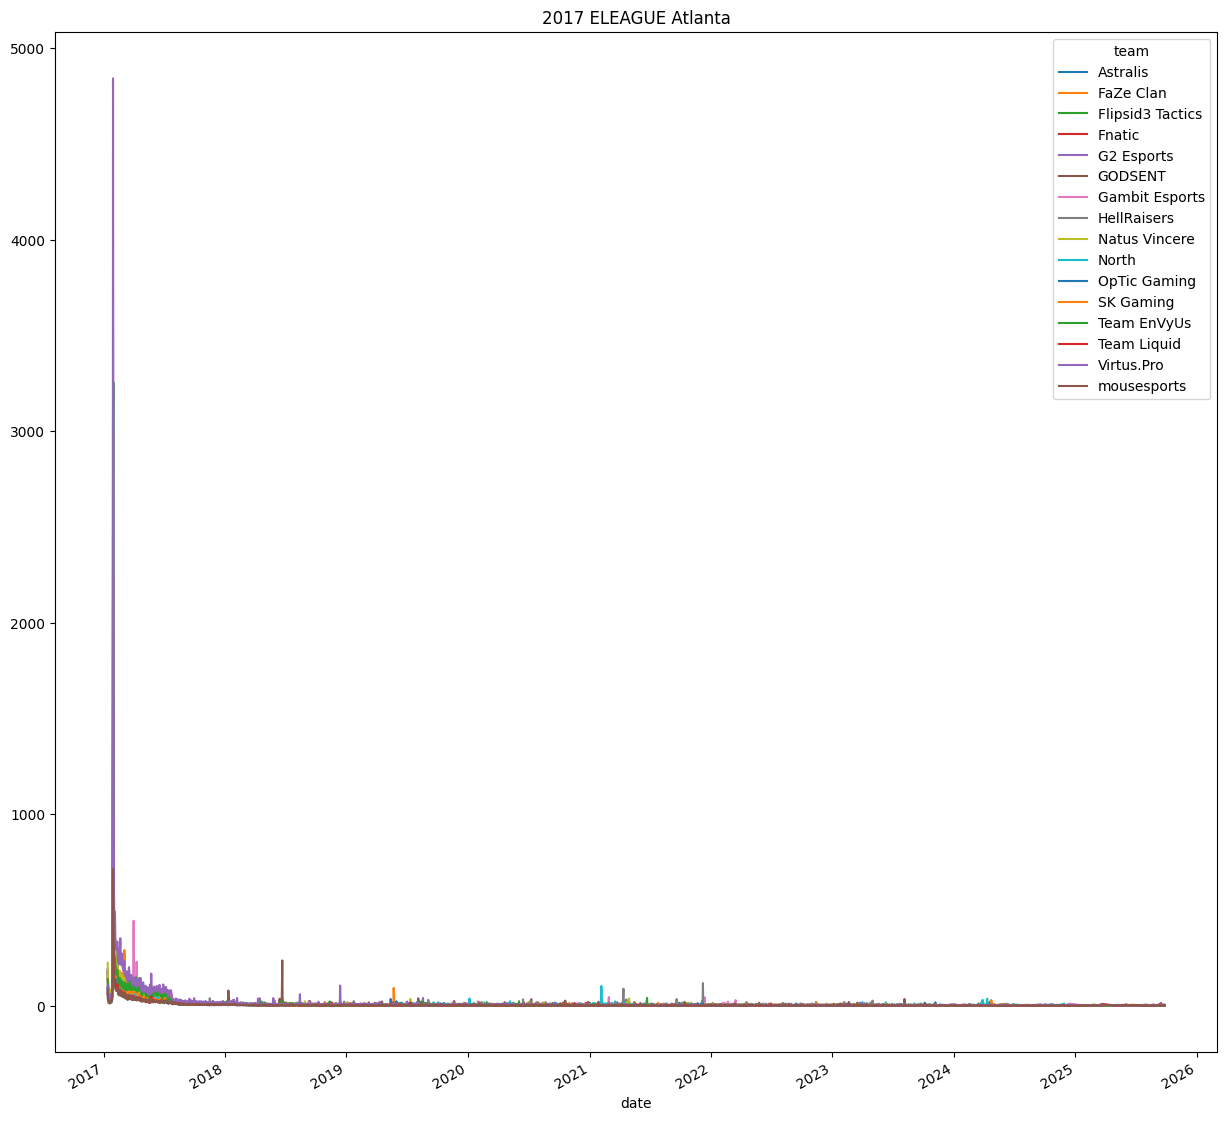

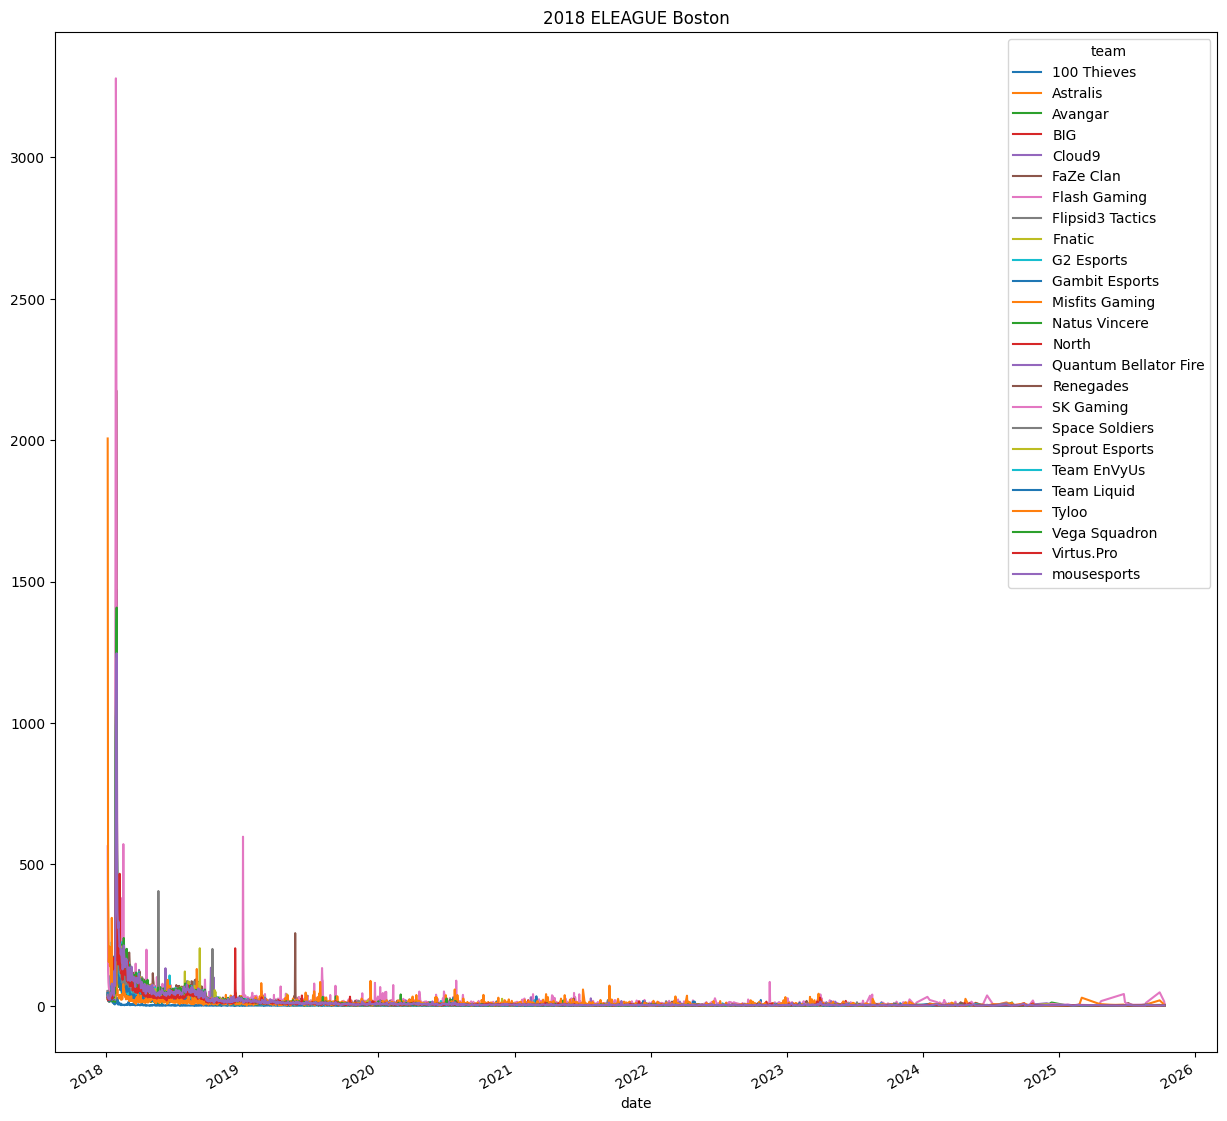

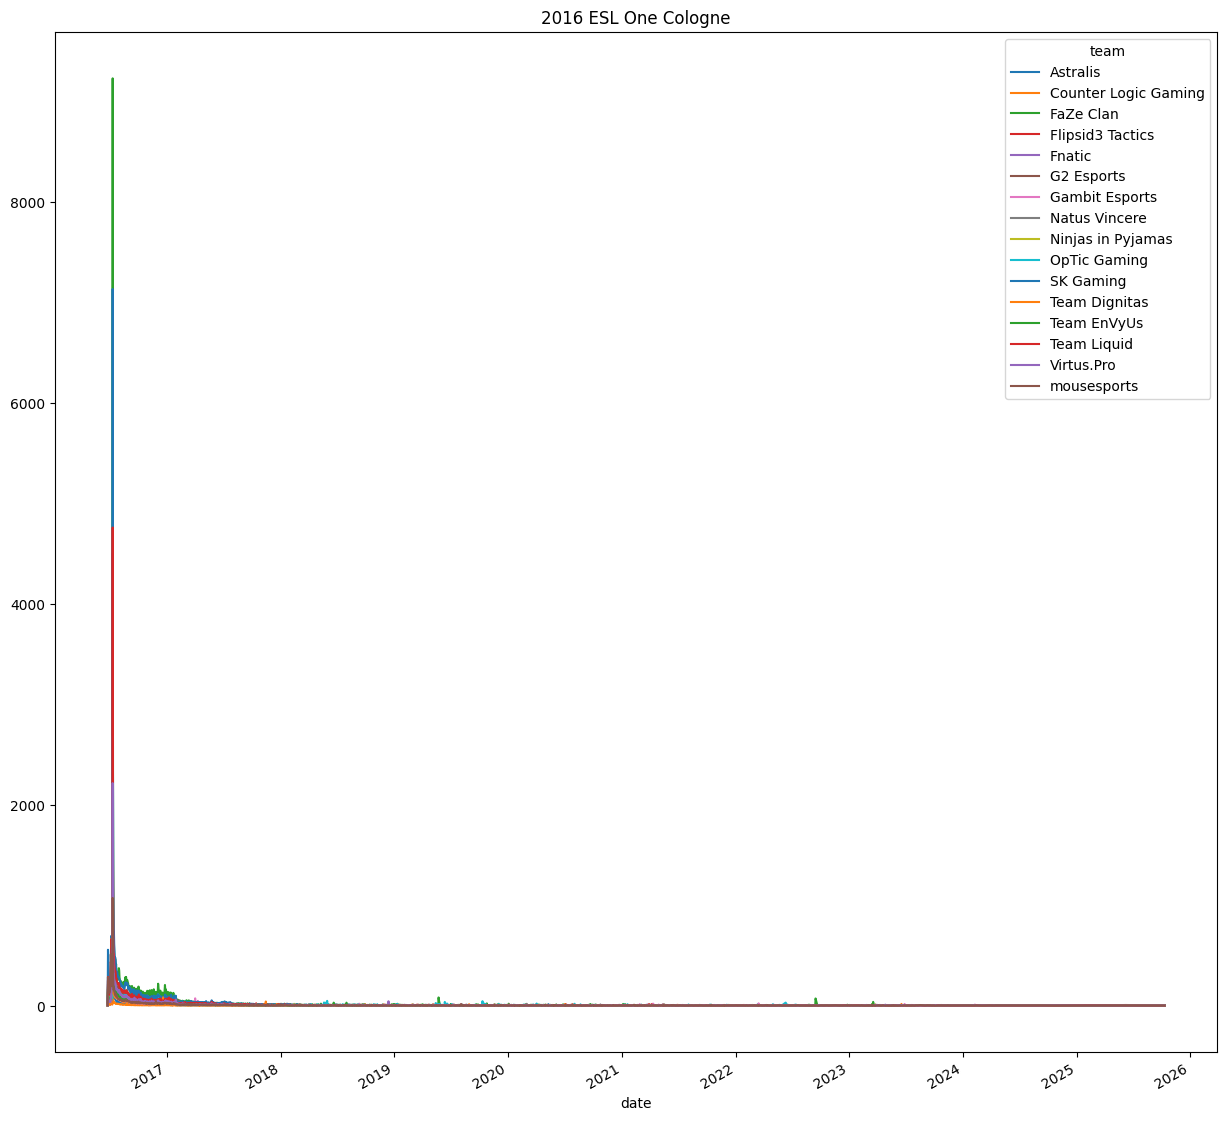

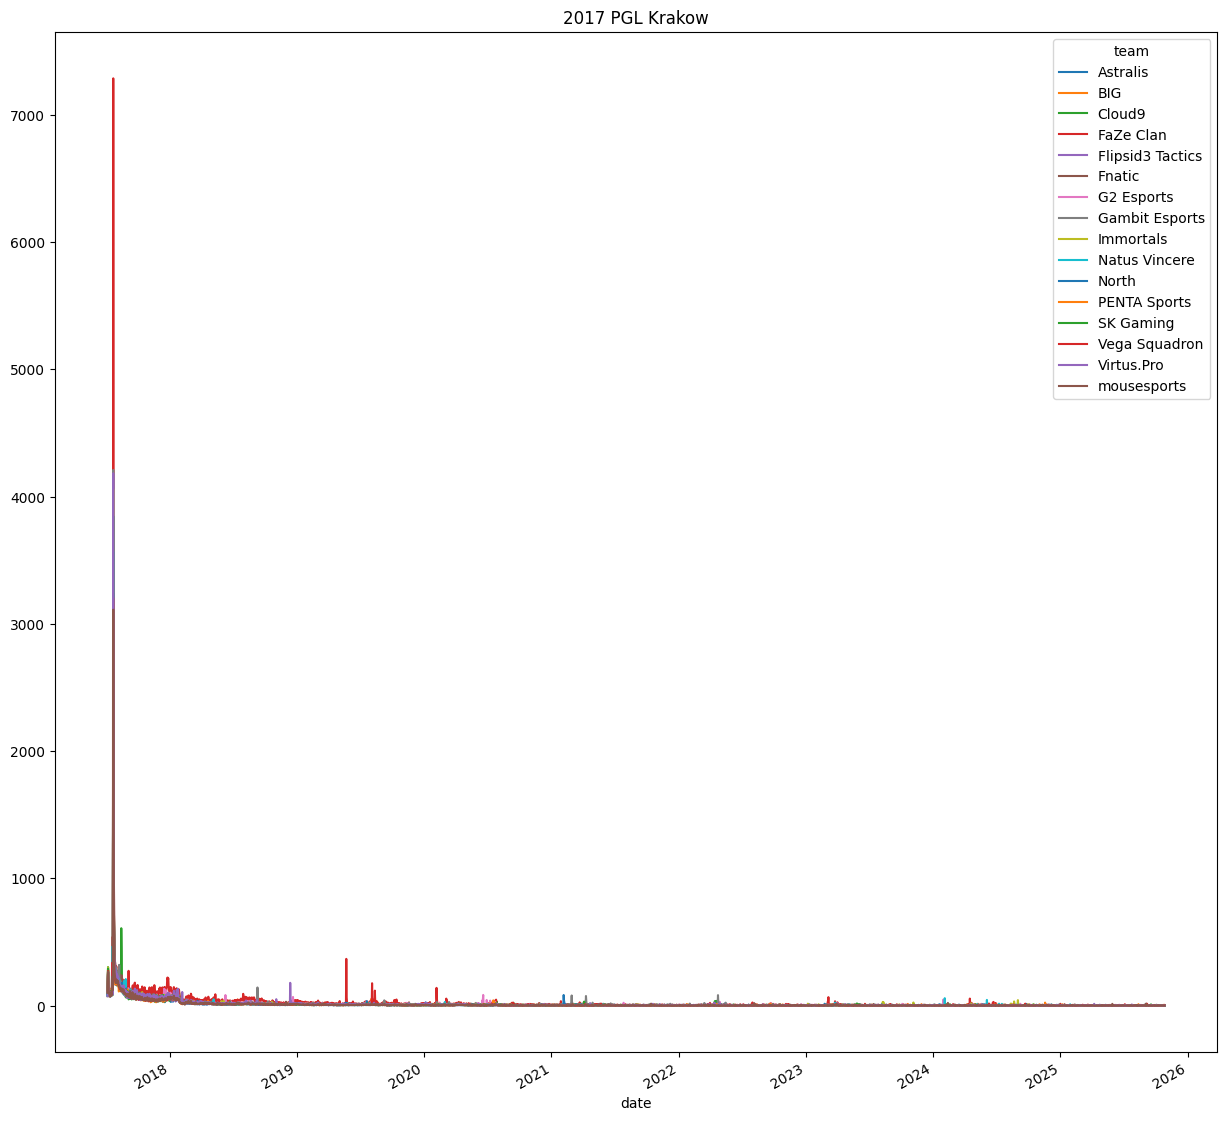

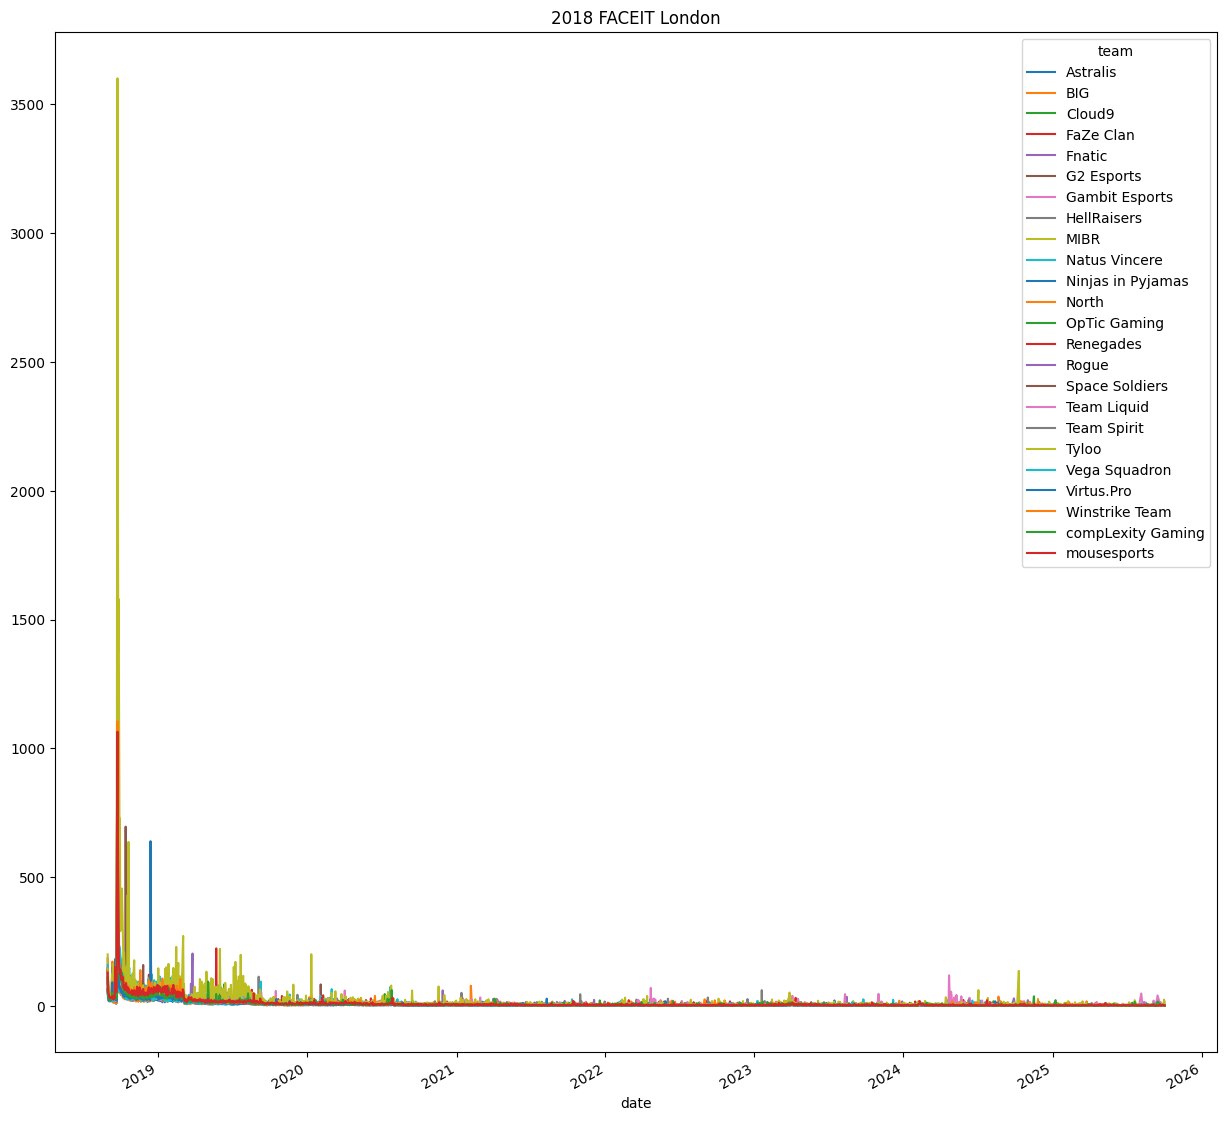

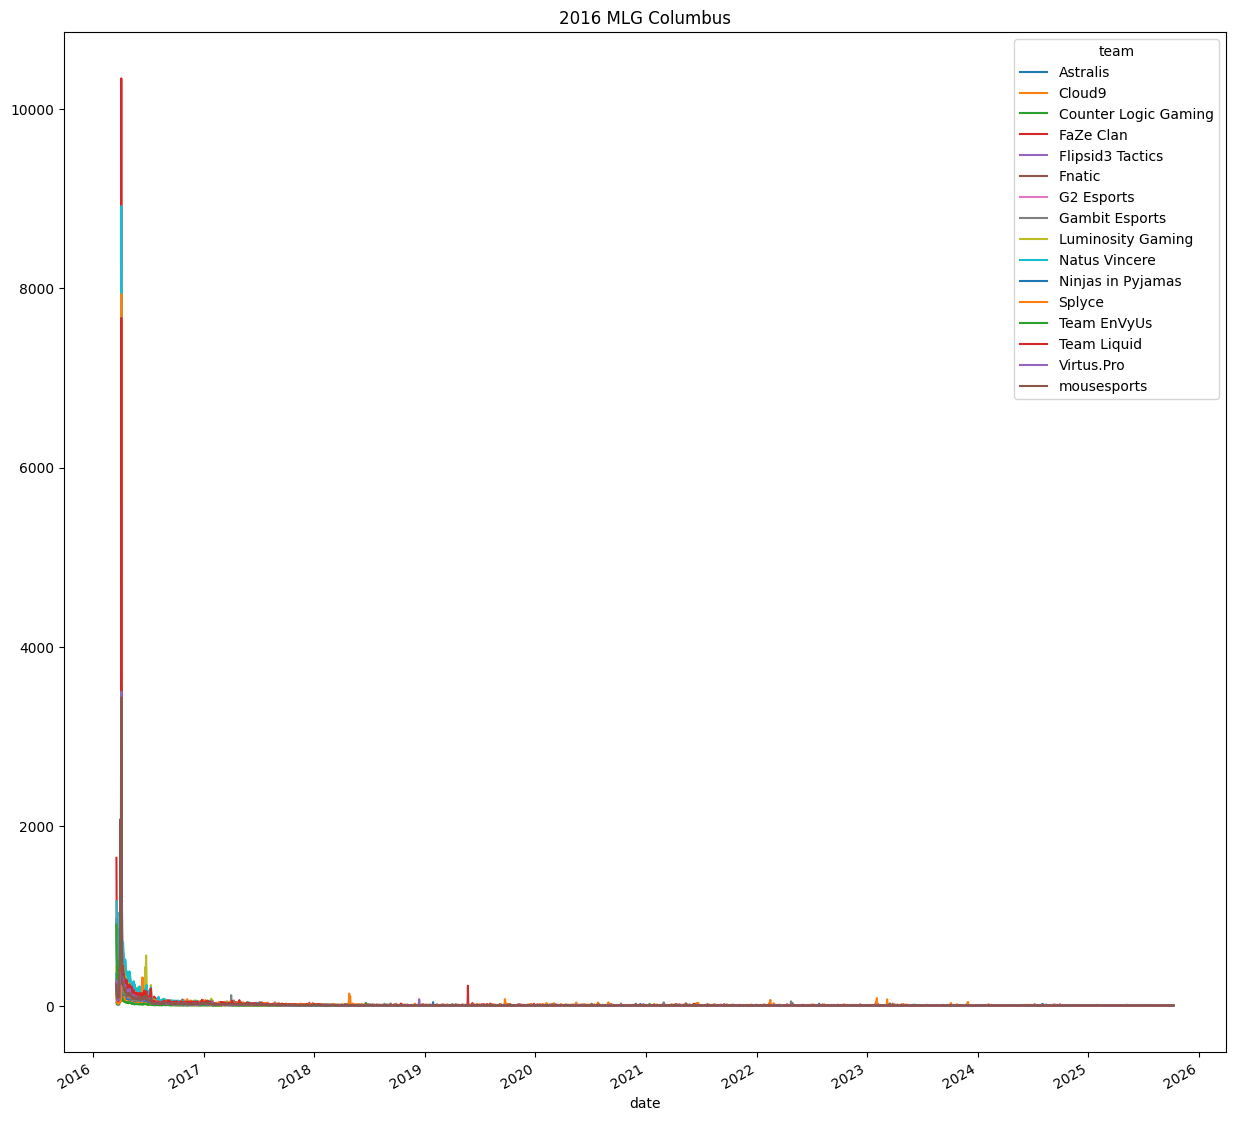

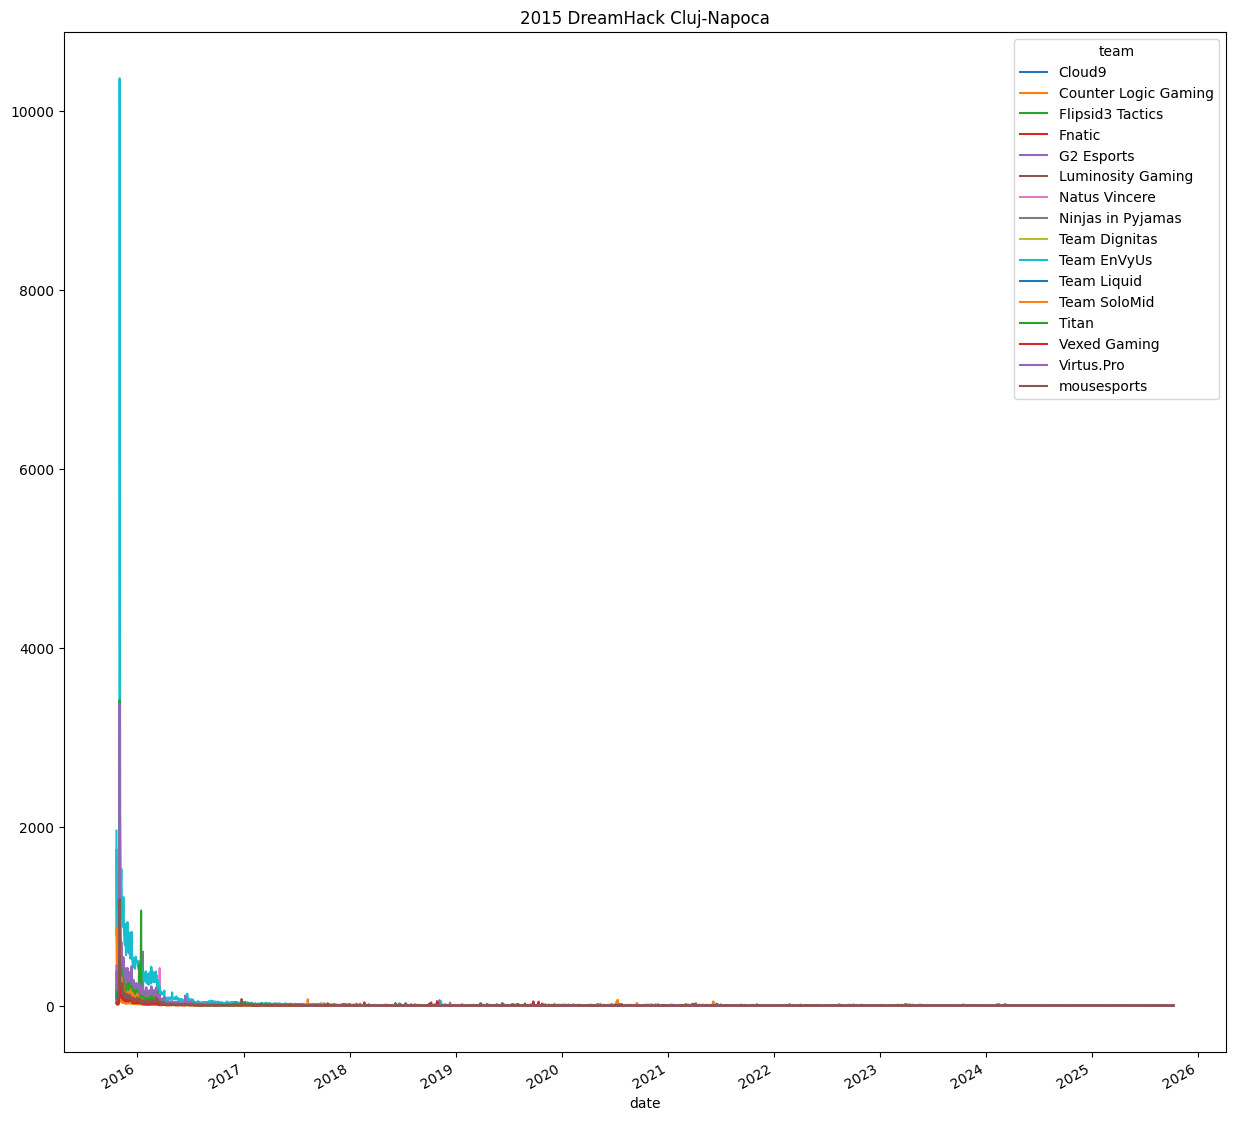

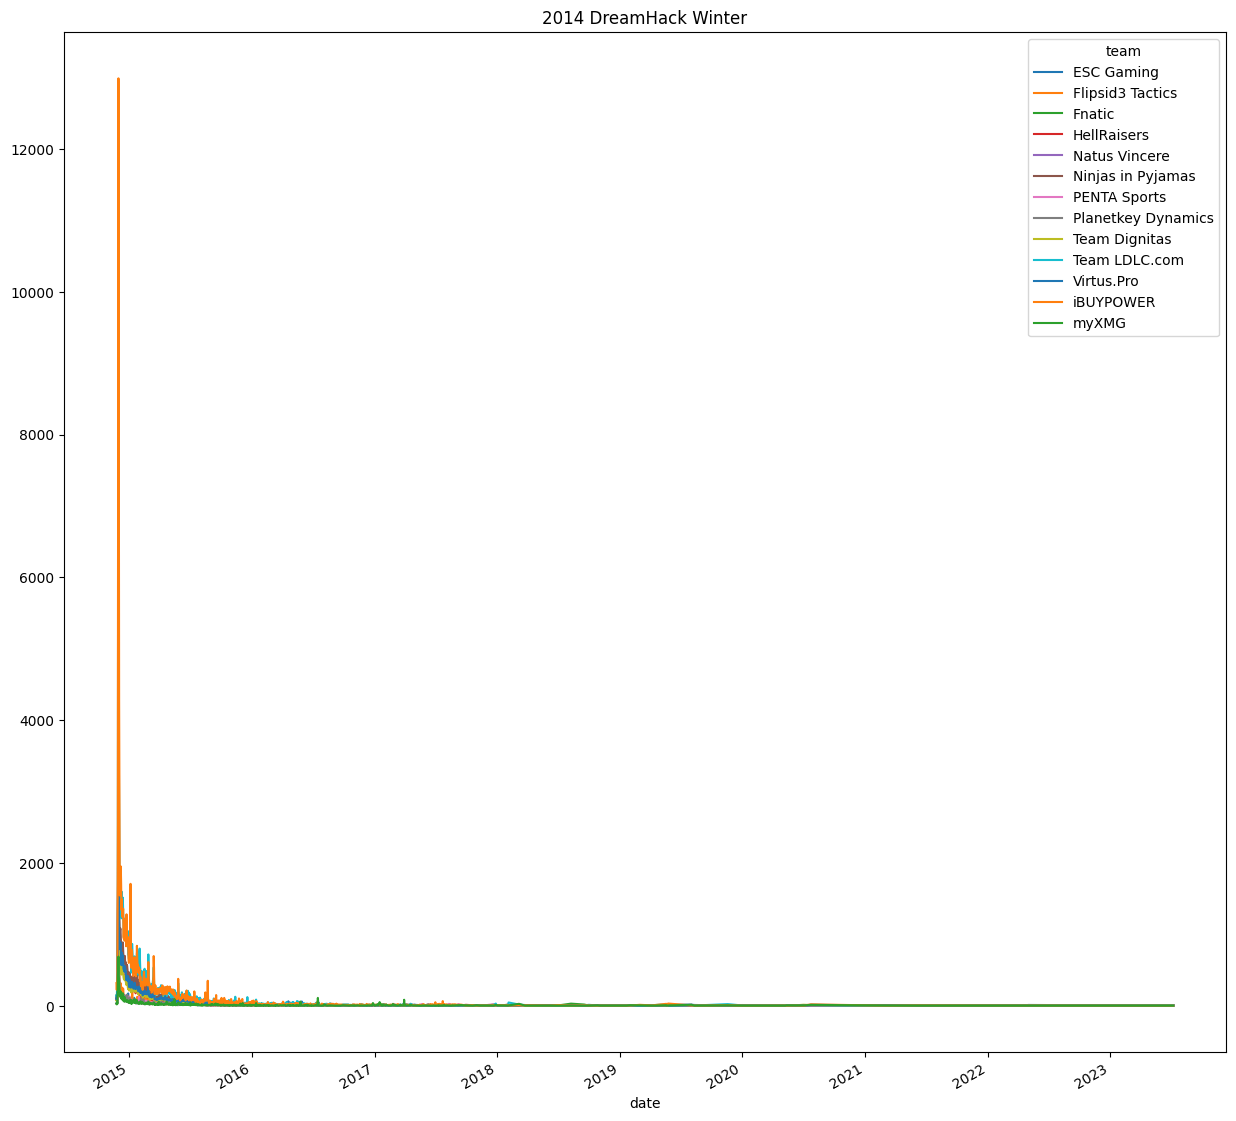

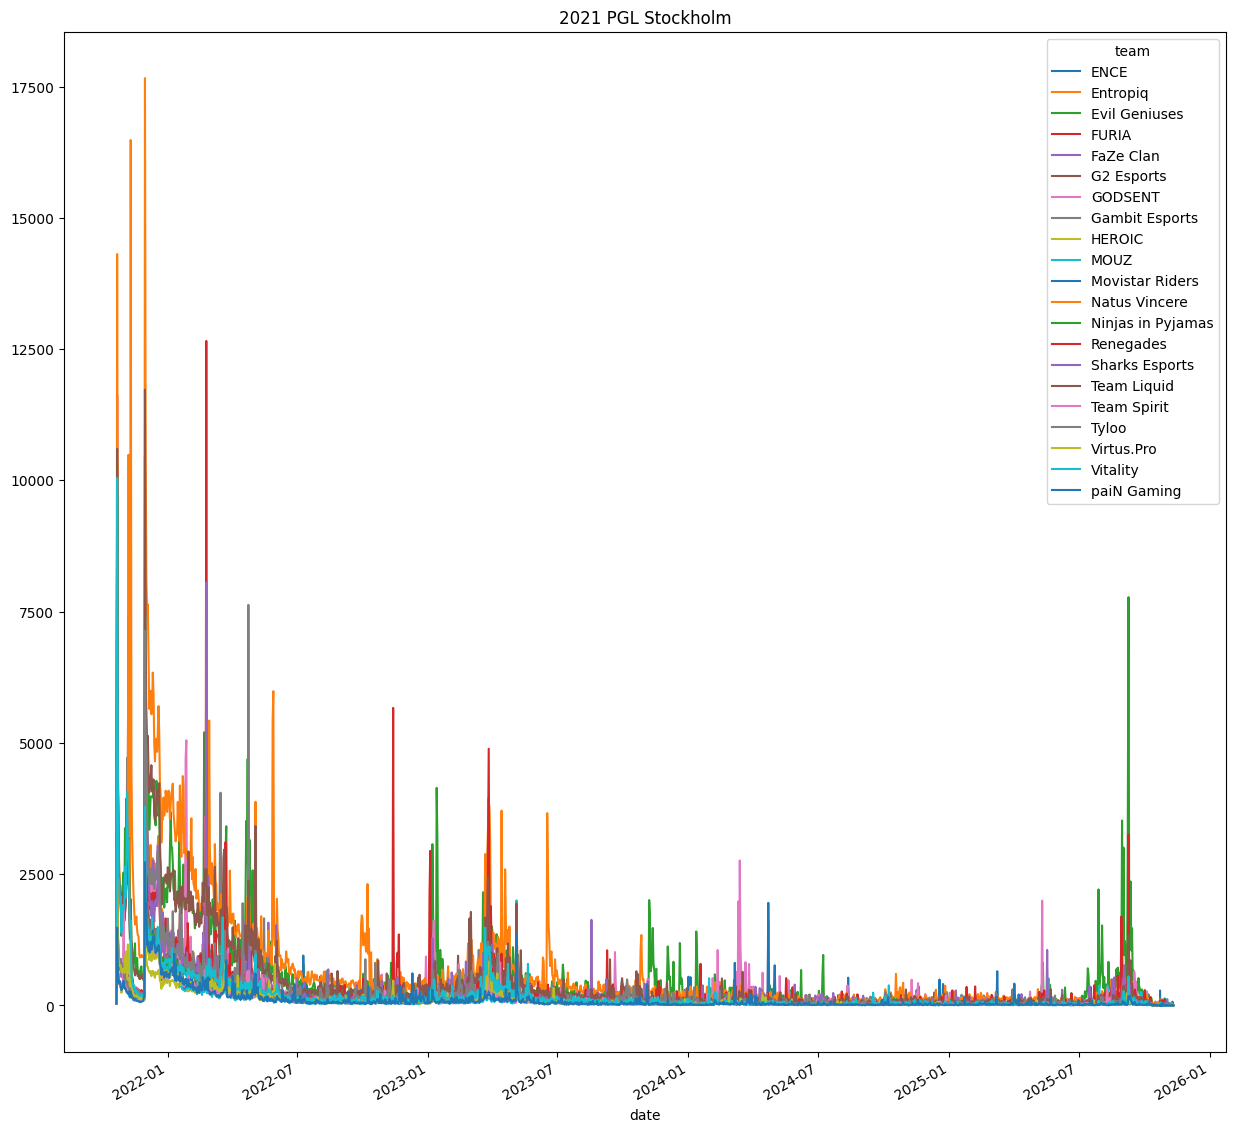

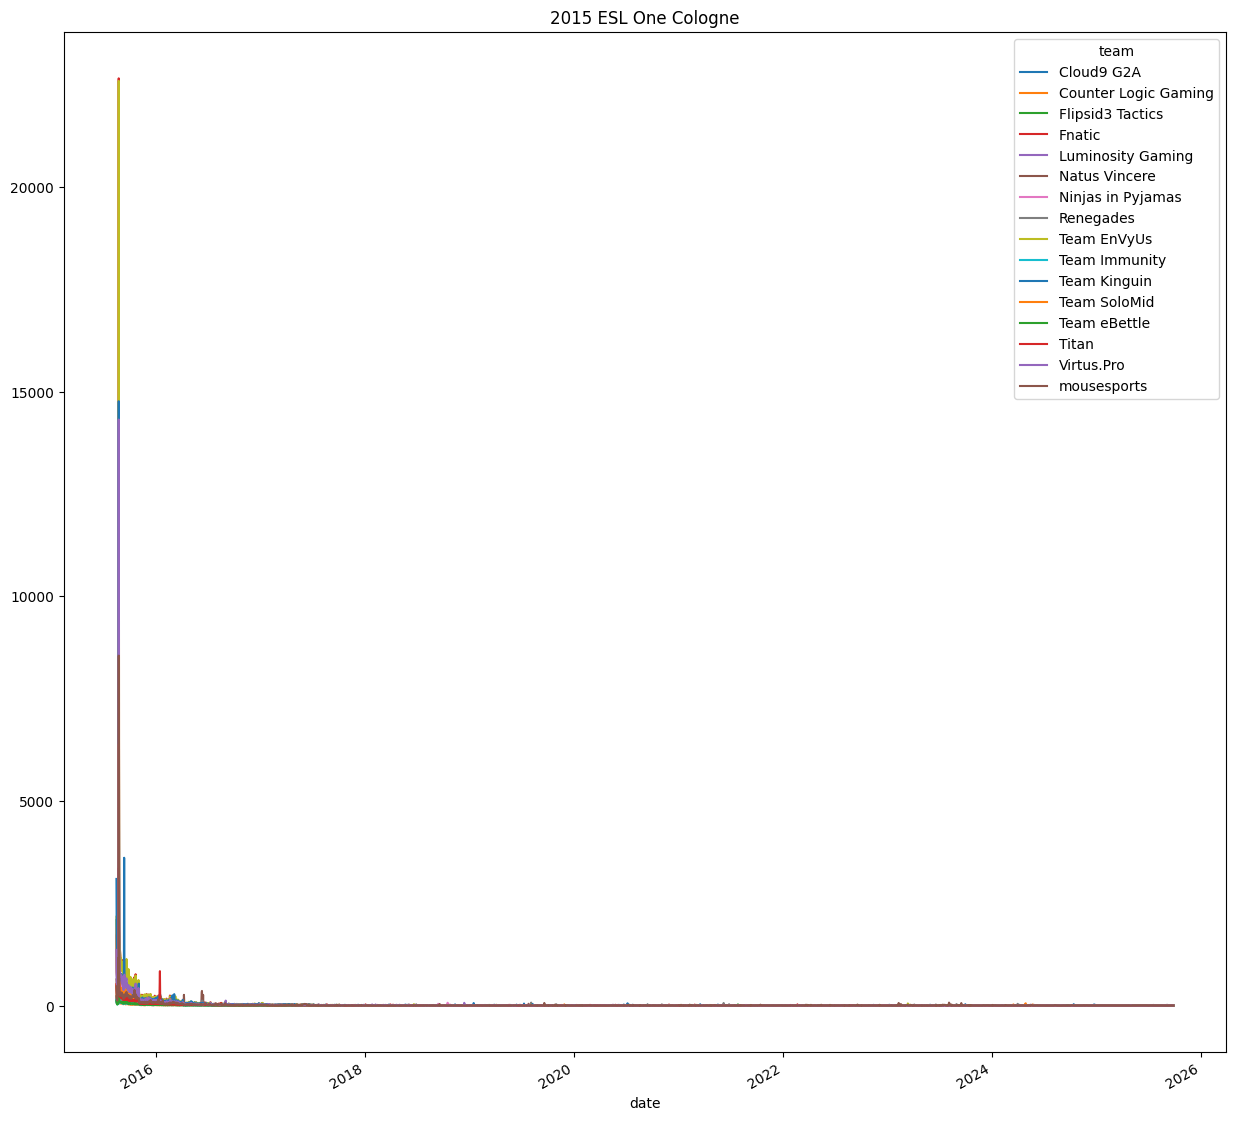

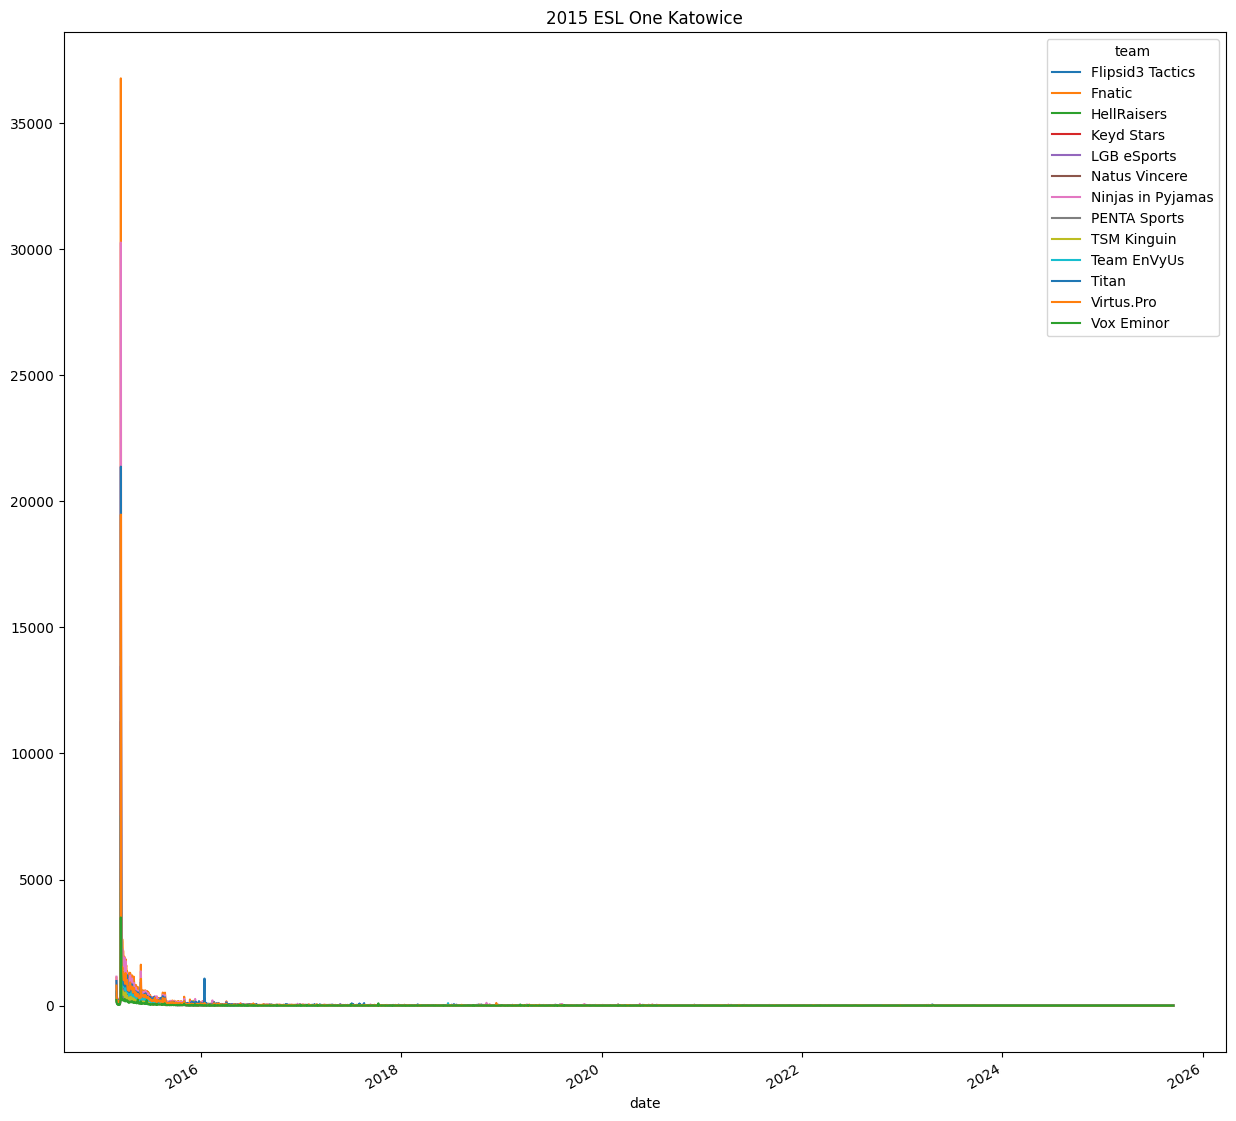

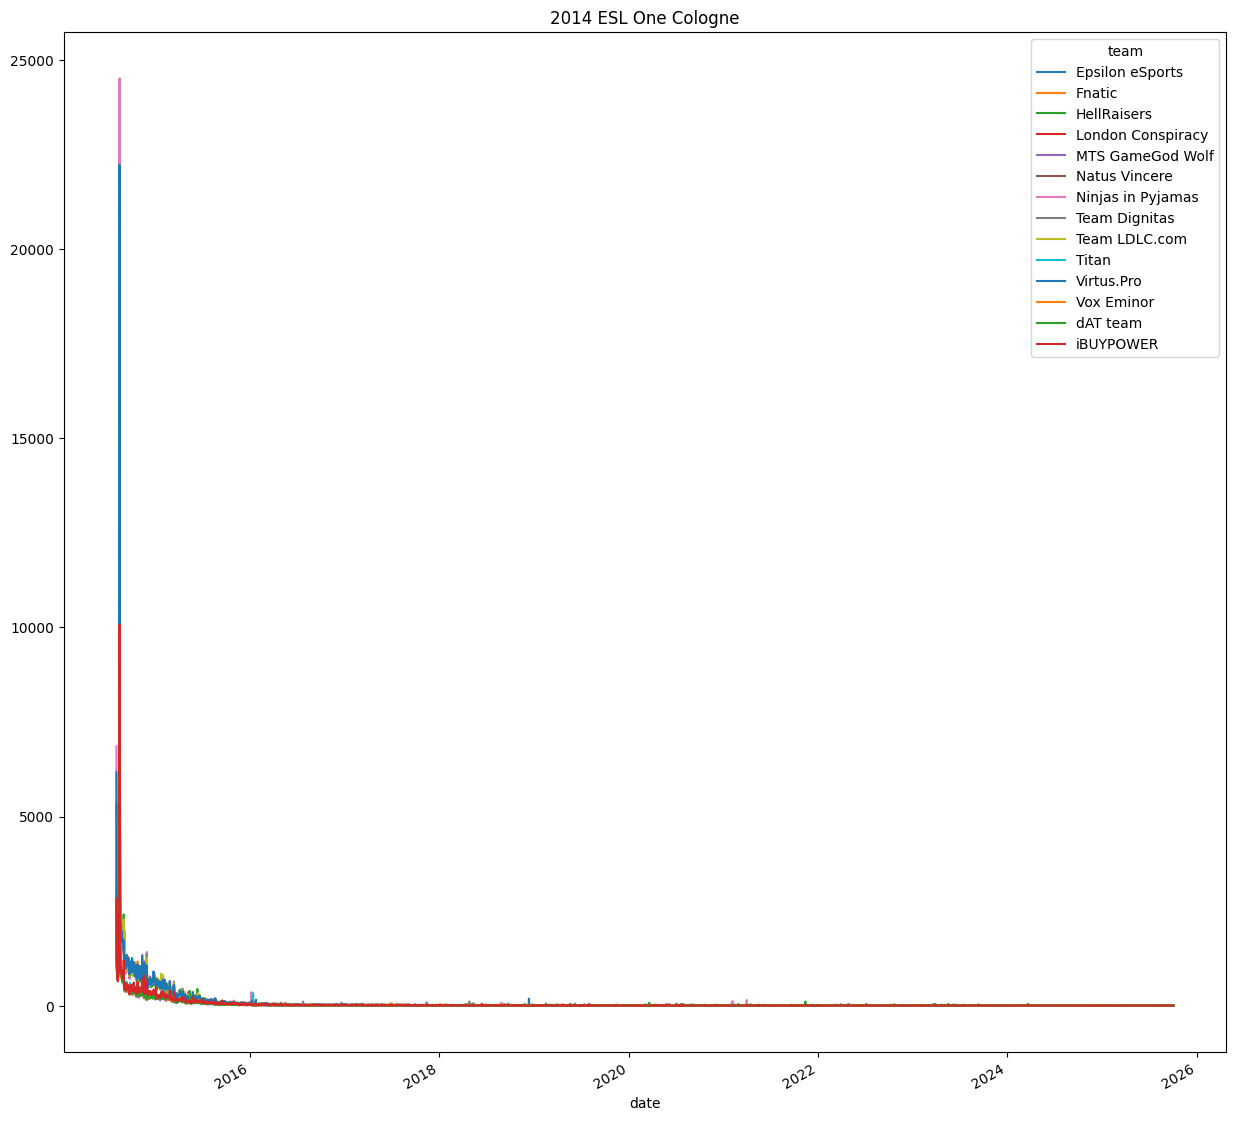

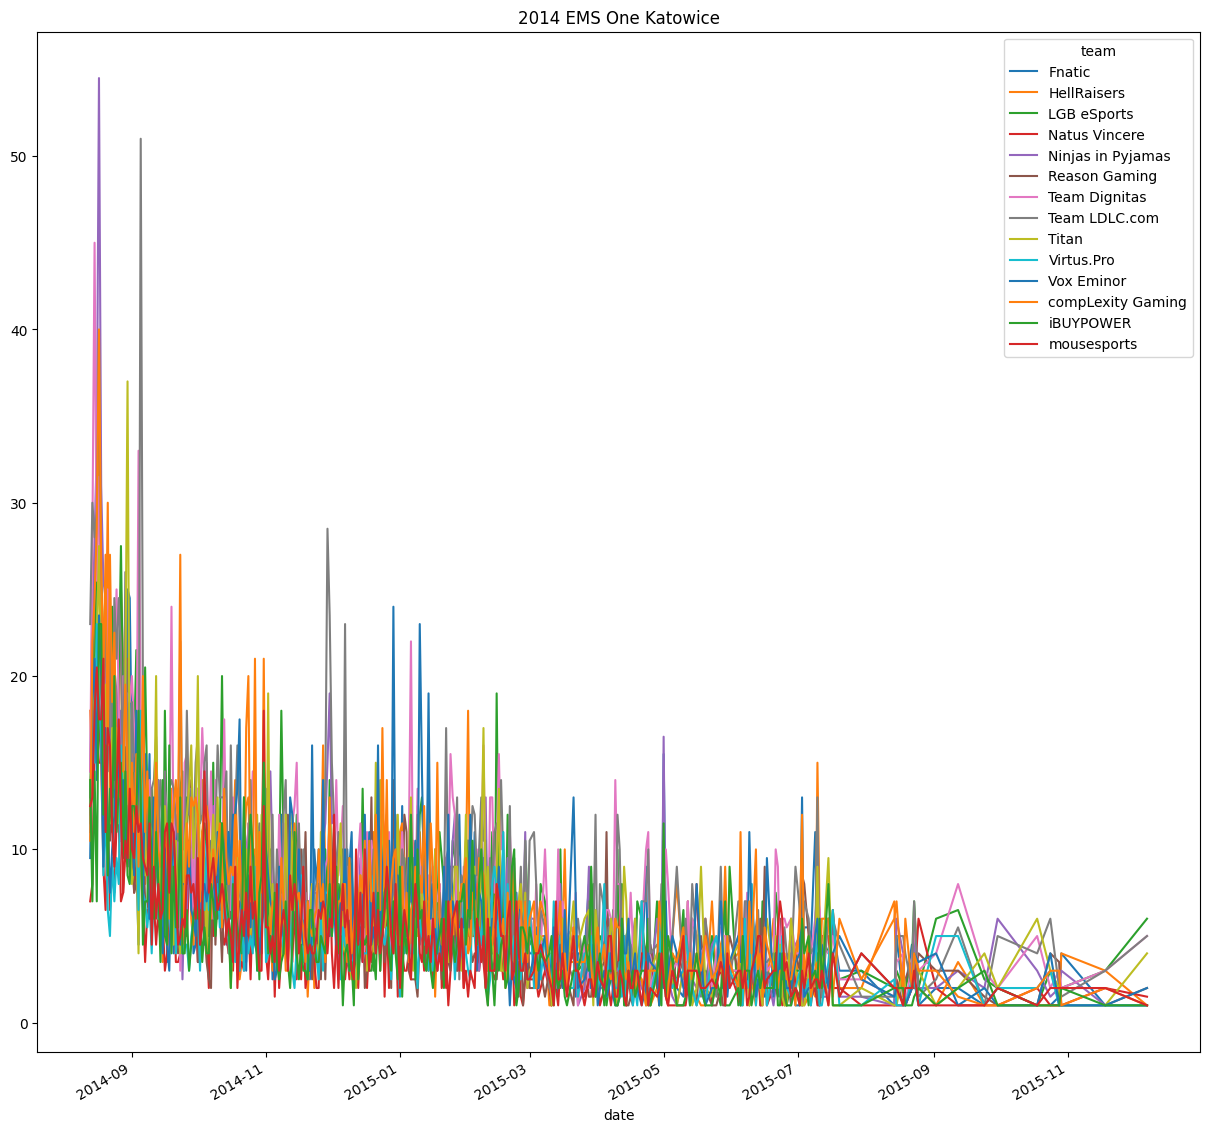

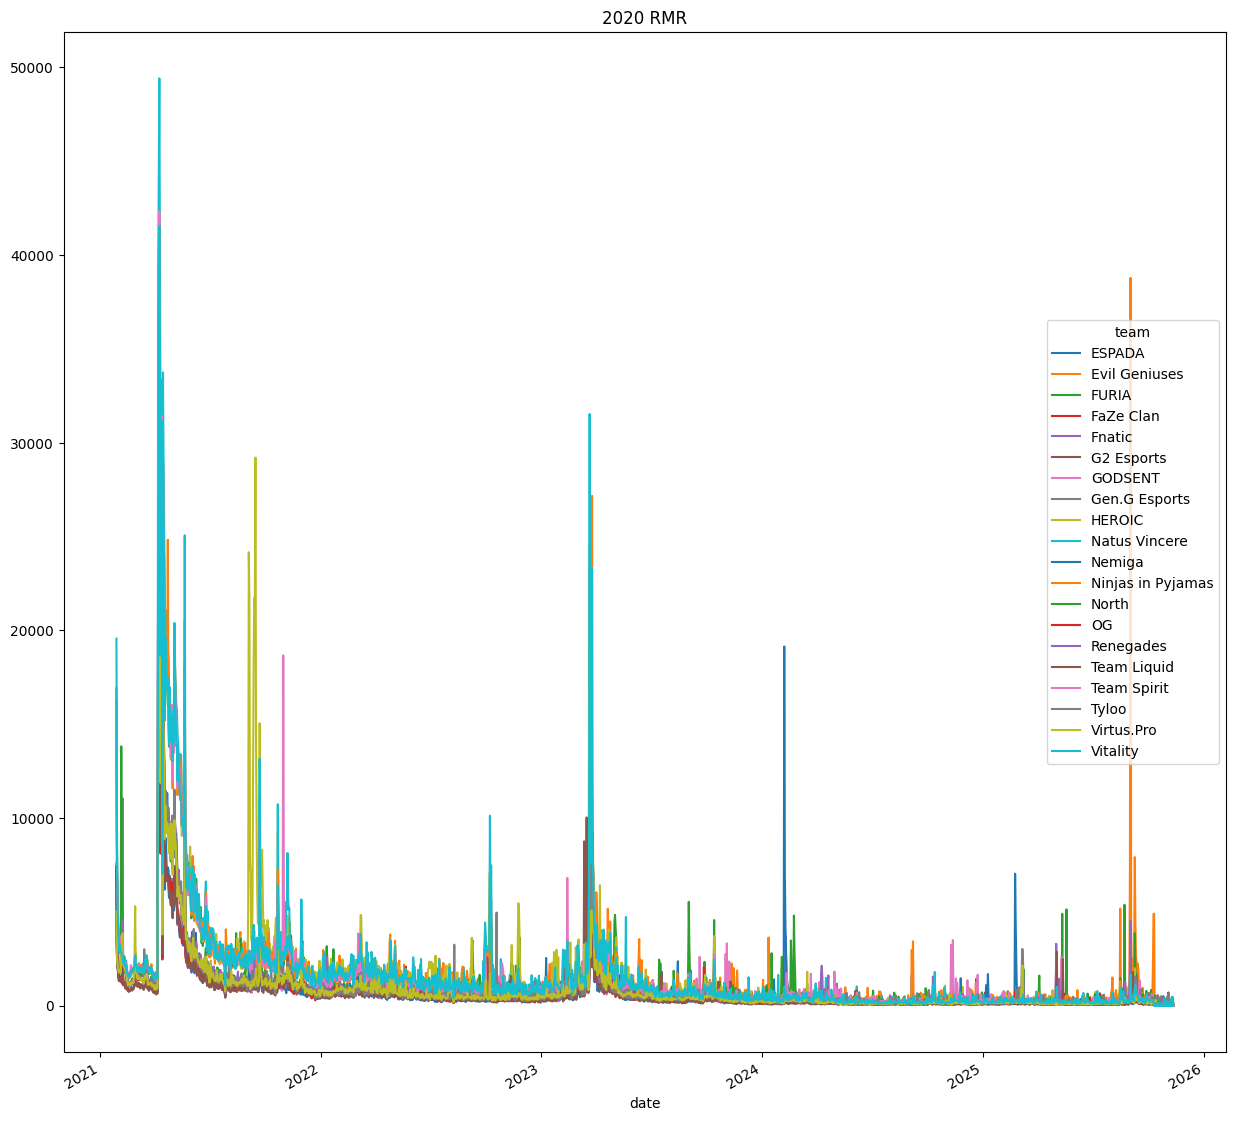

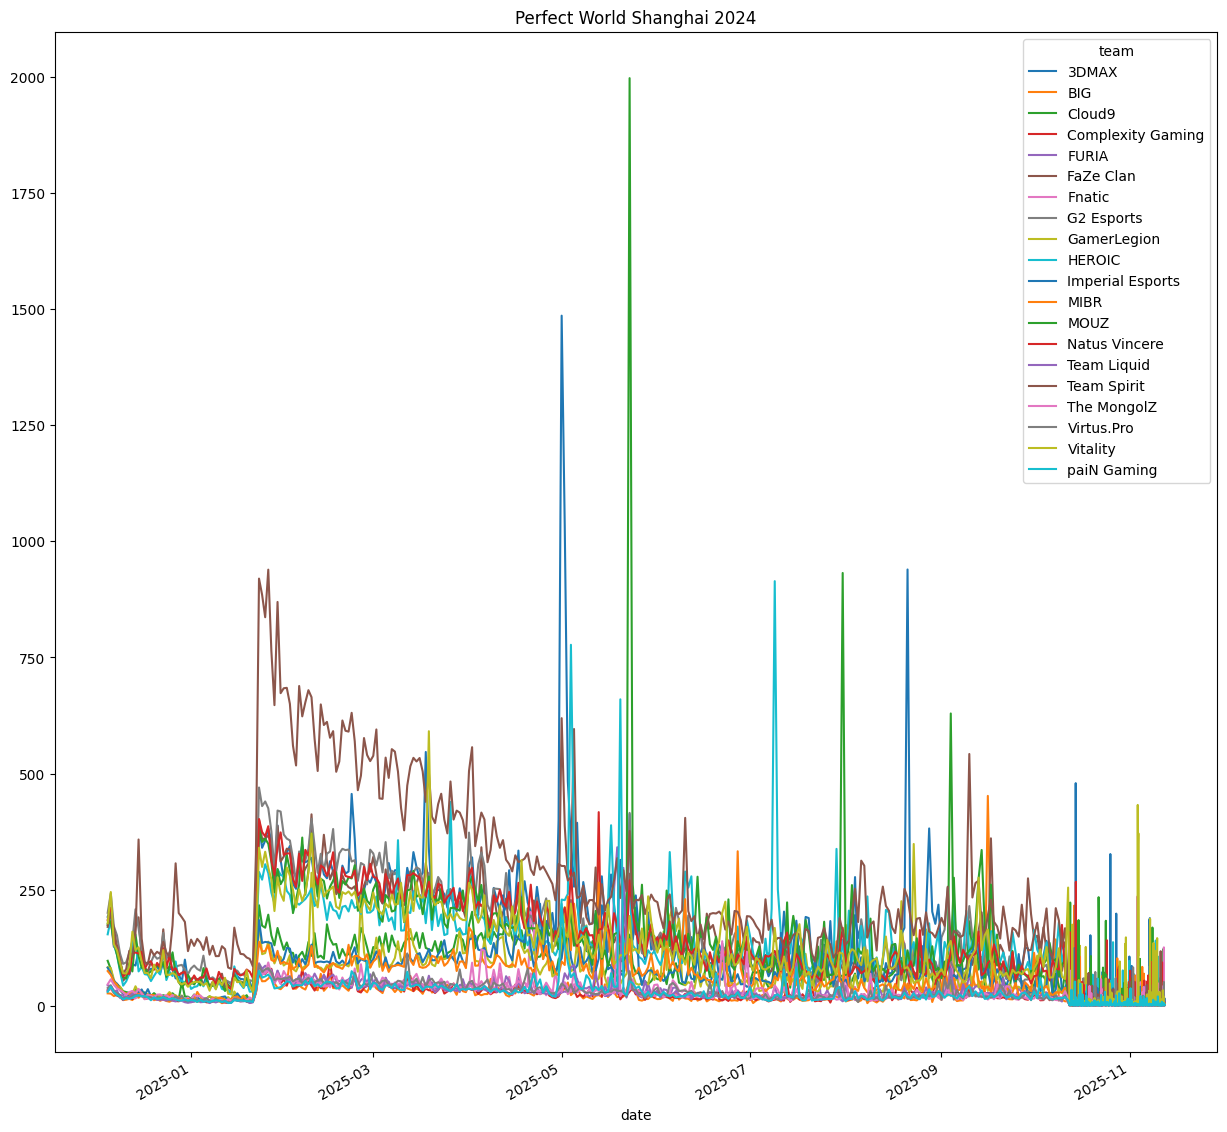

In [84]:
for x,y in duckdb.query("select tournament, tournament_id from stkr").df().drop_duplicates().values:
    if x is None:
        continue
    duckdb.query("select team, volume as money, date from stkr where tournament_id = "+ str(y) ).df().pivot_table(columns="team", values="money", index="date").dropna().reset_index().plot.line(
    x="date",
    title = x,
    figsize=(15,15)
)
    #+ " and ABS(DATEDIFF('day', '2019-09-05',date)) < 15"

In [77]:
duckdb.query("select team, volume as money, date from stkr where tournament_id = 16 and ABS(DATEDIFF('day', '2019-09-05',date)) < 15").df().pivot_table(columns="team", values="money", index="date").dropna().T.idxmax()

date
2019-08-22 01:00:00        Natus Vincere
2019-08-23 01:00:00                 MIBR
2019-08-24 01:00:00        Natus Vincere
2019-08-25 01:00:00                 MIBR
2019-08-26 01:00:00        Natus Vincere
2019-08-27 01:00:00             Astralis
2019-08-28 01:00:00                 MIBR
2019-08-29 01:00:00        Natus Vincere
2019-08-30 01:00:00    Ninjas in Pyjamas
2019-08-31 01:00:00                 MIBR
2019-09-01 01:00:00        Natus Vincere
2019-09-02 01:00:00                 MIBR
2019-09-03 01:00:00        Natus Vincere
2019-09-04 01:00:00        Natus Vincere
2019-09-05 01:00:00            Renegades
2019-09-06 01:00:00             Astralis
2019-09-07 01:00:00        Natus Vincere
2019-09-08 01:00:00        Natus Vincere
2019-09-09 01:00:00        Natus Vincere
2019-09-10 01:00:00        Natus Vincere
2019-09-11 01:00:00        Natus Vincere
2019-09-12 01:00:00        Natus Vincere
2019-09-13 01:00:00        Natus Vincere
2019-09-14 01:00:00              Avangar
2019-09-15 

<Axes: title={'center': 'Number of Stickers Sold by Tournament'}, xlabel='Tournament (Chronological)', ylabel='Total Volume Sold'>

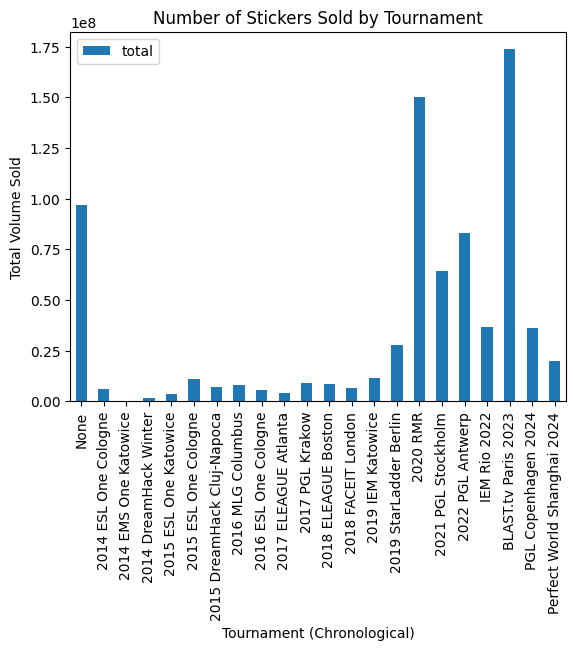

In [102]:
duckdb.query("select sum(volume) total, tournament from stkr group by tournament order by min(date)").df().plot.bar(
    x="tournament",
    y="total",
    ylabel="Total Volume Sold",
    title="Number of Stickers Sold by Tournament",
    xlabel="Tournament (Chronological)",
)

In [109]:
sticker_info = stkr.drop(axis="columns", columns=["price", "volume","date"]).drop_duplicates()

<Axes: xlabel='date'>

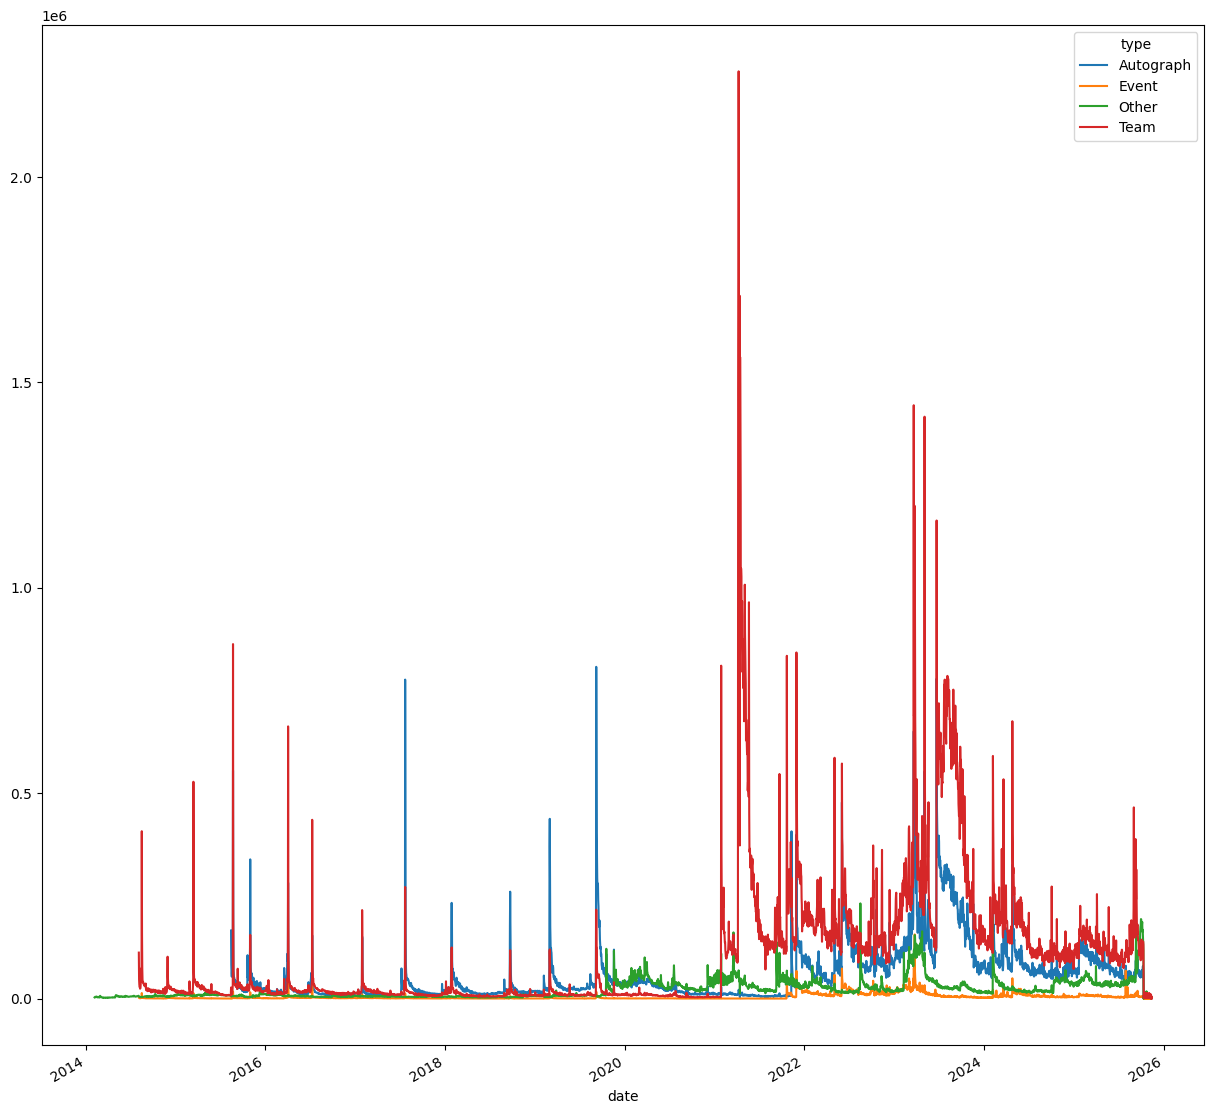

In [118]:
duckdb.query("select sum(volume) as sold, date, type from stkr group by date, type").df().pivot_table(
    columns="type",
    index="date",
    values="sold",
).plot.line(
    figsize=(15,15)
)

<Axes: title={'center': 'Number of Stickers Sold by Type'}, xlabel='type'>

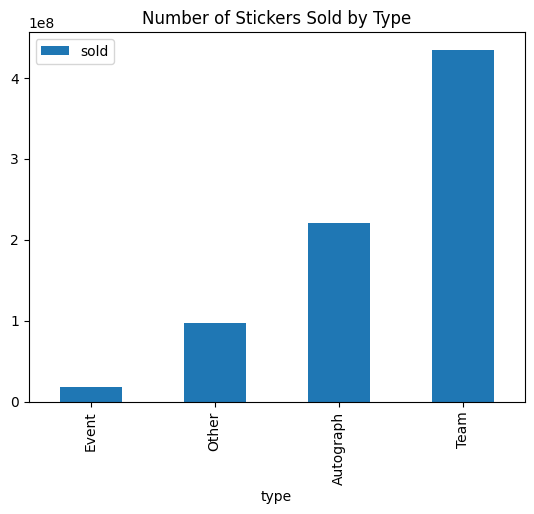

In [30]:
duckdb.query("select sum(volume) as sold, type from stkr group by type order by sold asc").df().plot.bar(
    x="type",
    y="sold",
    title="Number of Stickers Sold by Type"
)

<Axes: xlabel='date'>

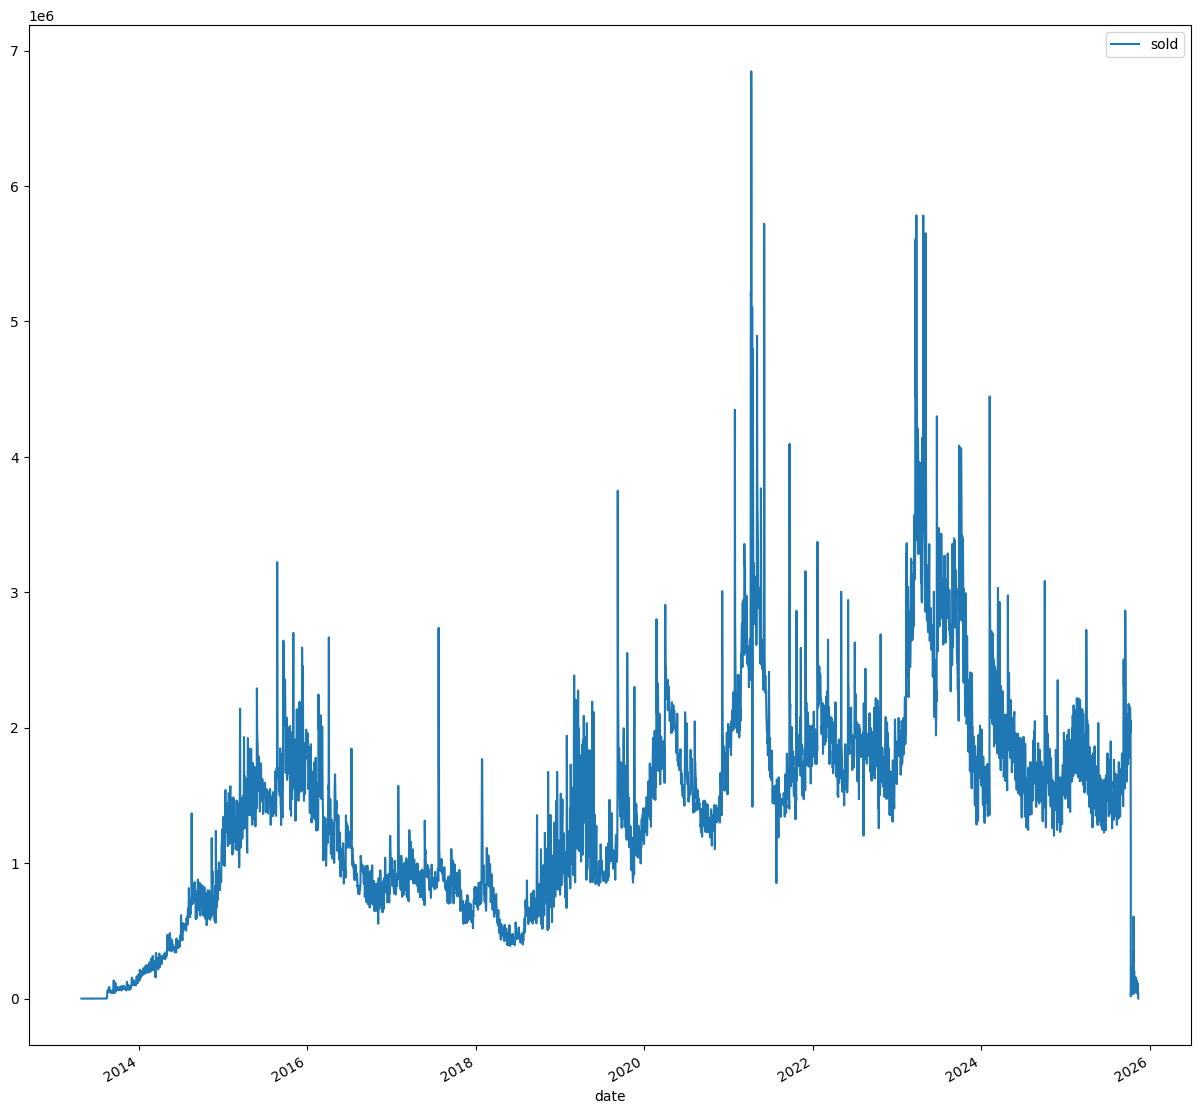

In [125]:
duckdb.query("select sum(volume) as sold, date from p1 group by date order by date").df().plot.line(
    x="date",
    y="sold",
    figsize=(15,15)
)